In [4]:
suppressMessages(library(ArchR))
library(parallel)
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=18, repr.plot.height=13)
suppressMessages(library(Seurat))
suppressMessages(library(SingleCellExperiment))
library(tidyverse)

In [6]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 8)

##################################
### load mm ArchR genome ###
addArchRGenome('mm10')

Input threads is equal to or greater than ncores minus 1 (7)
Setting cores to ncores minus 2. Set force = TRUE to set above this number!

Setting default number of Parallel threads to 6.

Setting default genome to Mm10.



In [7]:
PROJDIR='../../../data/tidy_data/ArchRProjects'
proj = loadArchRProject(file.path(PROJDIR,'Mouse_DorsalHorn_scATAC'), showLogo = FALSE)
projNeuron = loadArchRProject(file.path(PROJDIR,'Mouse_scATAC_DorsalHorn_neuron2'), showLogo = FALSE) #neuron2 is correct proj
projGlia = loadArchRProject(file.path(PROJDIR,'Mouse_scATAC_DorsalHorn_glia'), showLogo = FALSE)

Successfully loaded ArchRProject!

Successfully loaded ArchRProject!

Successfully loaded ArchRProject!



In [8]:
proj
projNeuron
projGlia


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/ArchRProjects/Mouse_DorsalHorn_scATAC 
samples(12): Mouse_DH_SEA2253A58 Mouse_DH_SEA2253A59 ...
  Mouse_DH_SEA2253A68 Mouse_DH_SEA2253A69
sampleColData names(8): ArrowFiles Sample_ID ... Species Region
cellColData names(31): Sample TSSEnrichment ... predictedGroup_RNA2ATAC
  FINAL_GROUP_LABEL
numberOfCells(1): 75955
medianTSS(1): 23.946
medianFrags(1): 16376


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/ArchRProjects/Mouse_scATAC_DorsalHorn_neuron2 
samples(12): Mouse_DH_SEA2253A60 Mouse_DH_SEA2253A61 ...
  Mouse_DH_SEA2253A69 Mouse_DH_SEA2253A68
sampleColData names(8): ArrowFiles Sample_ID ... Species Region
cellColData names(40): Sample TSSEnrichment ...
  predictedScore_RNA2ATAC_clustertype FINAL_GROUP_LABEL
numberOfCells(1): 20591
medianTSS(1): 20.626
medianFrags(1): 25740


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/ArchRProjects/Mouse_scATAC_DorsalHorn_glia 
samples(12): Mouse_DH_SEA2253A61 Mouse_DH_SEA2253A60 ...
  Mouse_DH_SEA2253A68 Mouse_DH_SEA2253A64
sampleColData names(8): ArrowFiles Sample_ID ... Species Region
cellColData names(38): Sample TSSEnrichment ... Clusters_RNALabels
  FINAL_GROUP_LABEL
numberOfCells(1): 55364
medianTSS(1): 25.181
medianFrags(1): 14350

In [5]:
#we need to standardize the column names, and choose the ones we want to keep
(names(getCellColData(projNeuron)))
(names(getCellColData(projGlia)))

[1] "Sample"                              "TSSEnrichment"                      
 [3] "ReadsInTSS"                          "ReadsInPromoter"                    
 [5] "ReadsInBlacklist"                    "PromoterRatio"                      
 [7] "PassQC"                              "NucleosomeRatio"                    
 [9] "nMultiFrags"                         "nMonoFrags"                         
[11] "nFrags"                              "nDiFrags"                           
[13] "DoubletScore"                        "DoubletEnrichment"                  
[15] "BlacklistRatio"                      "Sample_ID"                          
[17] "Date.nuclei.prep"                    "Biological.rep"                     
[19] "Age"                                 "Sex"                                
[21] "Species"                             "Region"                             
[23] "ClustersI200"                        "ClustersH200"                       
[25] "logNFrags"                           "Celltype1"                          
[27] "ClustersX60"                         "predictedCell_Co"                   
[29] "predictedGroup_RNA2ATACCo"           "predictedScore_RNA2ATACCo"          
[31] "ClustersX20"                         "ClustersX10"                        
[33] "predictedCell_Co_cell"               "predictedGroup_RNA2ATACCo_cell"     
[35] "predictedScore_RNA2ATACCo_cell"      "Neuron_Type"                        
[37] "predictedCell_clustertype"           "predictedGroup_RNA2ATAC_clustertype"
[39] "predictedScore_RNA2ATAC_clustertype"

[1] "Sample"                    "TSSEnrichment"            
 [3] "ReadsInTSS"                "ReadsInPromoter"          
 [5] "ReadsInBlacklist"          "PromoterRatio"            
 [7] "PassQC"                    "NucleosomeRatio"          
 [9] "nMultiFrags"               "nMonoFrags"               
[11] "nFrags"                    "nDiFrags"                 
[13] "DoubletScore"              "DoubletEnrichment"        
[15] "BlacklistRatio"            "Sample_ID"                
[17] "Date.nuclei.prep"          "Biological.rep"           
[19] "Age"                       "Sex"                      
[21] "Species"                   "Region"                   
[23] "ClustersI200"              "ClustersH200"             
[25] "logNFrags"                 "Celltype1"                
[27] "ClustersX60"               "predictedCell_Co"         
[29] "predictedGroup_RNA2ATACCo" "predictedScore_RNA2ATACCo"
[31] "ClustersX10_tmp"           "ClustersX10"              
[33] "ClustersX20"               "ClustersX30"              
[35] "ClustersX40"               "ClustersX50"              
[37] "Clusters_RNALabels"

In [7]:
#explain why each column is being dropped
#NEURONS
drop <- c("predictedCell_Co", "predictedGroup_RNA2ATACCo", "predictedScore_RNA2ATACCo", "predictedCell_Co_cell", 
         "predictedGroup_RNA2ATACCo_cell", "predictedScore_RNA2ATACCo_cell", "Neuron_Type")
Neur_vec <- names(getCellColData(projNeuron))
Neur_vec <- Neur_vec[Neur_vec %ni% drop]
df_Neuron = getCellColData(projNeuron, select = Neur_vec) #Neuron_type was manual annotations that aren't relevant anymore

#Set integrated labels as predictedXXXX_RNA2ATAC
colnames(df_Neuron)[which(names(df_Neuron) == "predictedCell_clustertype")] <- "predictedCell_RNA2ATAC"
colnames(df_Neuron)[which(names(df_Neuron) == "predictedGroup_RNA2ATAC_clustertype")] <- "predictedGroup_RNA2ATAC"
colnames(df_Neuron)[which(names(df_Neuron) == "predictedScore_RNA2ATAC_clustertype")] <- "predictedScore_RNA2ATAC"
names(df_Neuron)

#GLIA
drop = c("ClustersX10_tmp",'ClustersX10','ClustersX20','ClustersX30','ClustersX40','ClustersX50')
Glia_vec <- names(getCellColData(projGlia))
Glia_vec <- Glia_vec[Glia_vec %ni% drop]
Glia_vec #names of columns we want to keep
df_Glia = getCellColData(projGlia, select = Glia_vec)

#REPLACE predictedXXXX_RNA2ATAC WITH CLUSTERS_RNALABELS
df_Glia$predictedGroup_RNA2ATACCo = df_Glia$Clusters_RNALabels
df_Glia = df_Glia[,-31]
colnames(df_Glia)[which(names(df_Glia) == "predictedCell_Co")] <- "predictedCell_RNA2ATAC"
colnames(df_Glia)[which(names(df_Glia) == "predictedGroup_RNA2ATACCo")] <- "predictedGroup_RNA2ATAC"
colnames(df_Glia)[which(names(df_Glia) == "predictedScore_RNA2ATACCo")] <- "predictedScore_RNA2ATAC"
names(df_Glia)
table(df_Glia$Celltype1)
table(df_Glia$predictedGroup_RNA2ATAC)

[1] "Sample"                  "TSSEnrichment"          
 [3] "ReadsInTSS"              "ReadsInPromoter"        
 [5] "ReadsInBlacklist"        "PromoterRatio"          
 [7] "PassQC"                  "NucleosomeRatio"        
 [9] "nMultiFrags"             "nMonoFrags"             
[11] "nFrags"                  "nDiFrags"               
[13] "DoubletScore"            "DoubletEnrichment"      
[15] "BlacklistRatio"          "Sample_ID"              
[17] "Date.nuclei.prep"        "Biological.rep"         
[19] "Age"                     "Sex"                    
[21] "Species"                 "Region"                 
[23] "ClustersI200"            "ClustersH200"           
[25] "logNFrags"               "Celltype1"              
[27] "ClustersX60"             "ClustersX20"            
[29] "ClustersX10"             "predictedCell_RNA2ATAC" 
[31] "predictedGroup_RNA2ATAC" "predictedScore_RNA2ATAC"

[1] "Sample"                    "TSSEnrichment"            
 [3] "ReadsInTSS"                "ReadsInPromoter"          
 [5] "ReadsInBlacklist"          "PromoterRatio"            
 [7] "PassQC"                    "NucleosomeRatio"          
 [9] "nMultiFrags"               "nMonoFrags"               
[11] "nFrags"                    "nDiFrags"                 
[13] "DoubletScore"              "DoubletEnrichment"        
[15] "BlacklistRatio"            "Sample_ID"                
[17] "Date.nuclei.prep"          "Biological.rep"           
[19] "Age"                       "Sex"                      
[21] "Species"                   "Region"                   
[23] "ClustersI200"              "ClustersH200"             
[25] "logNFrags"                 "Celltype1"                
[27] "ClustersX60"               "predictedCell_Co"         
[29] "predictedGroup_RNA2ATACCo" "predictedScore_RNA2ATACCo"
[31] "Clusters_RNALabels"

[1] "Sample"                  "TSSEnrichment"          
 [3] "ReadsInTSS"              "ReadsInPromoter"        
 [5] "ReadsInBlacklist"        "PromoterRatio"          
 [7] "PassQC"                  "NucleosomeRatio"        
 [9] "nMultiFrags"             "nMonoFrags"             
[11] "nFrags"                  "nDiFrags"               
[13] "DoubletScore"            "DoubletEnrichment"      
[15] "BlacklistRatio"          "Sample_ID"              
[17] "Date.nuclei.prep"        "Biological.rep"         
[19] "Age"                     "Sex"                    
[21] "Species"                 "Region"                 
[23] "ClustersI200"            "ClustersH200"           
[25] "logNFrags"               "Celltype1"              
[27] "ClustersX60"             "predictedCell_RNA2ATAC" 
[29] "predictedGroup_RNA2ATAC" "predictedScore_RNA2ATAC"


Astrocyte  Meninges     Micro     Oligo       OPC   Schwann 
    13355       603      3284     33256       781      4085 


    Astrocyte.1     Astrocyte.2     Endothelial Ependymal.cells        Meninges 
           2417           10926             788             951               2 
      Microglia           Mural         Oligo.1         Oligo.2             OPC 
           2328             736           32624            1244            3348 

In [9]:
Glia_columns = names(df_Glia)
Neuron_columns = names(df_Neuron)

Neuron_columns
Glia_columns

[1] "Sample"                  "TSSEnrichment"          
 [3] "ReadsInTSS"              "ReadsInPromoter"        
 [5] "ReadsInBlacklist"        "PromoterRatio"          
 [7] "PassQC"                  "NucleosomeRatio"        
 [9] "nMultiFrags"             "nMonoFrags"             
[11] "nFrags"                  "nDiFrags"               
[13] "DoubletScore"            "DoubletEnrichment"      
[15] "BlacklistRatio"          "Sample_ID"              
[17] "Date.nuclei.prep"        "Biological.rep"         
[19] "Age"                     "Sex"                    
[21] "Species"                 "Region"                 
[23] "ClustersI200"            "ClustersH200"           
[25] "logNFrags"               "Celltype1"              
[27] "ClustersX60"             "ClustersX20"            
[29] "ClustersX10"             "predictedCell_RNA2ATAC" 
[31] "predictedGroup_RNA2ATAC" "predictedScore_RNA2ATAC"

[1] "Sample"                  "TSSEnrichment"          
 [3] "ReadsInTSS"              "ReadsInPromoter"        
 [5] "ReadsInBlacklist"        "PromoterRatio"          
 [7] "PassQC"                  "NucleosomeRatio"        
 [9] "nMultiFrags"             "nMonoFrags"             
[11] "nFrags"                  "nDiFrags"               
[13] "DoubletScore"            "DoubletEnrichment"      
[15] "BlacklistRatio"          "Sample_ID"              
[17] "Date.nuclei.prep"        "Biological.rep"         
[19] "Age"                     "Sex"                    
[21] "Species"                 "Region"                 
[23] "ClustersI200"            "ClustersH200"           
[25] "logNFrags"               "Celltype1"              
[27] "ClustersX60"             "predictedCell_RNA2ATAC" 
[29] "predictedGroup_RNA2ATAC" "predictedScore_RNA2ATAC"

In [10]:
table(df_Neuron$predictedGroup_RNA2ATAC)
table(df_Glia$predictedGroup_RNA2ATAC)


  GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1 GABA4_2   GABA5   GLUT1  GLUT10  GLUT11 
   1078      64    1545     376     967     795    1320    1092     431      39 
  GLUT2   GLUT3   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9  midVen 
   2452    1945     341     992    2195    2283    1157       1    1518 


    Astrocyte.1     Astrocyte.2     Endothelial Ependymal.cells        Meninges 
           2417           10926             788             951               2 
      Microglia           Mural         Oligo.1         Oligo.2             OPC 
           2328             736           32624            1244            3348 

In [11]:
#check to see if this merge is working properly
columns = names(df_Glia)
df_label = rbind(df_Neuron[,columns],df_Glia[,columns] )
df_label
dim(df_label)
print(getCellColData(proj))

DataFrame with 75955 rows and 30 columns
                                                  Sample TSSEnrichment
                                             <character>     <numeric>
Mouse_DH_SEA2253A58#TTACACACTTCGTCAA Mouse_DH_SEA2253A58        14.164
Mouse_DH_SEA2253A58#GCGTGCTGAAGCAGGT Mouse_DH_SEA2253A58        15.910
Mouse_DH_SEA2253A58#CGACCAGACTTCTGAG Mouse_DH_SEA2253A58        10.861
Mouse_DH_SEA2253A58#TCAGTCCTGAATACAG Mouse_DH_SEA2253A58        17.269
Mouse_DH_SEA2253A58#GCTTTAGGATCGTAAC Mouse_DH_SEA2253A58        18.201
...                                                  ...           ...
Mouse_DH_SEA2253A69#GACTACCCTGGCCATC Mouse_DH_SEA2253A69        10.693
Mouse_DH_SEA2253A69#GACAAGGTGCTGAGAG Mouse_DH_SEA2253A69        17.317
Mouse_DH_SEA2253A69#GACCTATGAGGTGCAA Mouse_DH_SEA2253A69        11.675
Mouse_DH_SEA2253A69#GACTACCCTTCGGGCT Mouse_DH_SEA2253A69        13.119
Mouse_DH_SEA2253A69#TAAAAAAAAAAAAAAG Mouse_DH_SEA2253A69        30.716
                                    

[1] 75955    30

DataFrame with 75955 rows and 29 columns
                                                  Sample TSSEnrichment
                                             <character>     <numeric>
Mouse_DH_SEA2253A58#TTACACACTTCGTCAA Mouse_DH_SEA2253A58        14.164
Mouse_DH_SEA2253A58#GCGTGCTGAAGCAGGT Mouse_DH_SEA2253A58        15.910
Mouse_DH_SEA2253A58#CGACCAGACTTCTGAG Mouse_DH_SEA2253A58        10.861
Mouse_DH_SEA2253A58#TCAGTCCTGAATACAG Mouse_DH_SEA2253A58        17.269
Mouse_DH_SEA2253A58#GAGGGATACCTGGCAC Mouse_DH_SEA2253A58        25.310
...                                                  ...           ...
Mouse_DH_SEA2253A69#GACTACCCTGGCCATC Mouse_DH_SEA2253A69        10.693
Mouse_DH_SEA2253A69#GACAAGGTGCTGAGAG Mouse_DH_SEA2253A69        17.317
Mouse_DH_SEA2253A69#GACCTATGAGGTGCAA Mouse_DH_SEA2253A69        11.675
Mouse_DH_SEA2253A69#GACTACCCTTCGGGCT Mouse_DH_SEA2253A69        13.119
Mouse_DH_SEA2253A69#TAAAAAAAAAAAAAAG Mouse_DH_SEA2253A69        30.716
                                    

In [12]:
proj <- addCellColData(ArchRProj = proj, data = df_label$predictedGroup_RNA2ATAC,
    cells = rownames(df_label), name = "predictedGroup_RNA2ATAC", force = TRUE)


In [13]:
proj
getCellColData(proj)


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/ArchRProjects/Mouse_DorsalHorn_scATAC 
samples(12): Mouse_DH_SEA2253A58 Mouse_DH_SEA2253A59 ...
  Mouse_DH_SEA2253A68 Mouse_DH_SEA2253A69
sampleColData names(8): ArrowFiles Sample_ID ... Species Region
cellColData names(30): Sample TSSEnrichment ... FRIP
  predictedGroup_RNA2ATAC
numberOfCells(1): 75955
medianTSS(1): 23.946
medianFrags(1): 16376

DataFrame with 75955 rows and 30 columns
                                                  Sample TSSEnrichment
                                             <character>     <numeric>
Mouse_DH_SEA2253A58#TTACACACTTCGTCAA Mouse_DH_SEA2253A58        14.164
Mouse_DH_SEA2253A58#GCGTGCTGAAGCAGGT Mouse_DH_SEA2253A58        15.910
Mouse_DH_SEA2253A58#CGACCAGACTTCTGAG Mouse_DH_SEA2253A58        10.861
Mouse_DH_SEA2253A58#TCAGTCCTGAATACAG Mouse_DH_SEA2253A58        17.269
Mouse_DH_SEA2253A58#GAGGGATACCTGGCAC Mouse_DH_SEA2253A58        25.310
...                                                  ...           ...
Mouse_DH_SEA2253A69#GACTACCCTGGCCATC Mouse_DH_SEA2253A69        10.693
Mouse_DH_SEA2253A69#GACAAGGTGCTGAGAG Mouse_DH_SEA2253A69        17.317
Mouse_DH_SEA2253A69#GACCTATGAGGTGCAA Mouse_DH_SEA2253A69        11.675
Mouse_DH_SEA2253A69#GACTACCCTTCGGGCT Mouse_DH_SEA2253A69        13.119
Mouse_DH_SEA2253A69#TAAAAAAAAAAAAAAG Mouse_DH_SEA2253A69        30.716
                                    

In [5]:
table(proj$Celltype1)
table(proj$predictedGroup_RNA2ATACCo)
table(proj$predictedGroup_RNA2ATAC)


  Astrocyte    Ex-Cpne4      Ex-Maf    Ex-Prkcg     Ex-Reln    Ex-Rreb1 
      13355        1330        2134         523        3426           5 
    Ex-Sox5 Inh-Adamts5    Inh-Cdh3     Inh-Npy    Inh-Pdyn    Inh-Rorb 
       5592        2296        1073         405        1308        1105 
   Meninges       Micro     midVent       Oligo         OPC     Schwann 
        603        3284        1394       33256         781        4085 


    Astrocyte.1     Astrocyte.2     Endothelial Ependymal.cells           GABA1 
           2417           10926             788             951            1077 
          GABA2           GABA3           GABA4           GABA5           GLUT1 
           1606             405            1786            1310             564 
         GLUT10          GLUT11           GLUT2           GLUT3           GLUT4 
            289               8            2848            1604             806 
          GLUT5           GLUT6           GLUT7           GLUT8           GLUT9 
              5            2892            2135            1586              56 
       Meninges       Microglia          midVen           Mural         Oligo.1 
              2            2328            1614             736           32624 
        Oligo.2             OPC 
           1244            3348 


    Astrocyte.1     Astrocyte.2     Endothelial Ependymal.cells           GABA1 
           2417           10926             788             951            1078 
        GABA2_1         GABA2_2           GABA3         GABA4_1         GABA4_2 
             64            1545             376             967             795 
          GABA5           GLUT1          GLUT10          GLUT11           GLUT2 
           1320            1092             431              39            2452 
          GLUT3           GLUT4           GLUT5           GLUT6           GLUT7 
           1945             341             992            2195            2283 
          GLUT8           GLUT9        Meninges       Microglia          midVen 
           1157               1               2            2328            1518 
          Mural         Oligo.1         Oligo.2             OPC 
            736           32624            1244            3348 

In [20]:
## subset to cells with integrated labels
idxPass <- which(!is.na(proj$predictedGroup_RNA2ATACCo) & 
                 proj$predictedGroup_RNA2ATACCo %ni% c('Drop', 'NA.', 'TH')) # too few cluster

#impute weights dropped, 'cell-x-cell' matrix
cellsPass <- proj$cellNames[idxPass]
proj = subsetCells(ArchRProj = proj, cellNames = cellsPass)
proj
getCellColData(proj)


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq/data/tidy_data/ArchRProjects/Mouse_DorsalHorn_scATAC 
samples(12): Mouse_DH_SEA2253A58 Mouse_DH_SEA2253A59 ...
  Mouse_DH_SEA2253A68 Mouse_DH_SEA2253A69
sampleColData names(8): ArrowFiles Sample_ID ... Species Region
cellColData names(29): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 75955
medianTSS(1): 23.946
medianFrags(1): 16376

DataFrame with 75955 rows and 29 columns
                                                  Sample TSSEnrichment
                                             <character>     <numeric>
Mouse_DH_SEA2253A58#TTACACACTTCGTCAA Mouse_DH_SEA2253A58        14.164
Mouse_DH_SEA2253A58#GCGTGCTGAAGCAGGT Mouse_DH_SEA2253A58        15.910
Mouse_DH_SEA2253A58#CGACCAGACTTCTGAG Mouse_DH_SEA2253A58        10.861
Mouse_DH_SEA2253A58#TCAGTCCTGAATACAG Mouse_DH_SEA2253A58        17.269
Mouse_DH_SEA2253A58#GAGGGATACCTGGCAC Mouse_DH_SEA2253A58        25.310
...                                                  ...           ...
Mouse_DH_SEA2253A69#GACTACCCTGGCCATC Mouse_DH_SEA2253A69        10.693
Mouse_DH_SEA2253A69#GACAAGGTGCTGAGAG Mouse_DH_SEA2253A69        17.317
Mouse_DH_SEA2253A69#GACCTATGAGGTGCAA Mouse_DH_SEA2253A69        11.675
Mouse_DH_SEA2253A69#GACTACCCTTCGGGCT Mouse_DH_SEA2253A69        13.119
Mouse_DH_SEA2253A69#TAAAAAAAAAAAAAAG Mouse_DH_SEA2253A69        30.716
                                    

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a69f3940f522-Date-2023-01-31_Time-21-54-23.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a69f3940f522-Date-2023-01-31_Time-21-54-23.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a69f7a2bb031-Date-2023-01-31_Time-21-54-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a69f7a2bb031-Date-2023-01-31_Time-21-54-42.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a69f66db3091-Date-2023-01-31_Time-21-54-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 

Length of unique values greater than palette, interpolating..



ArchR logging successful t

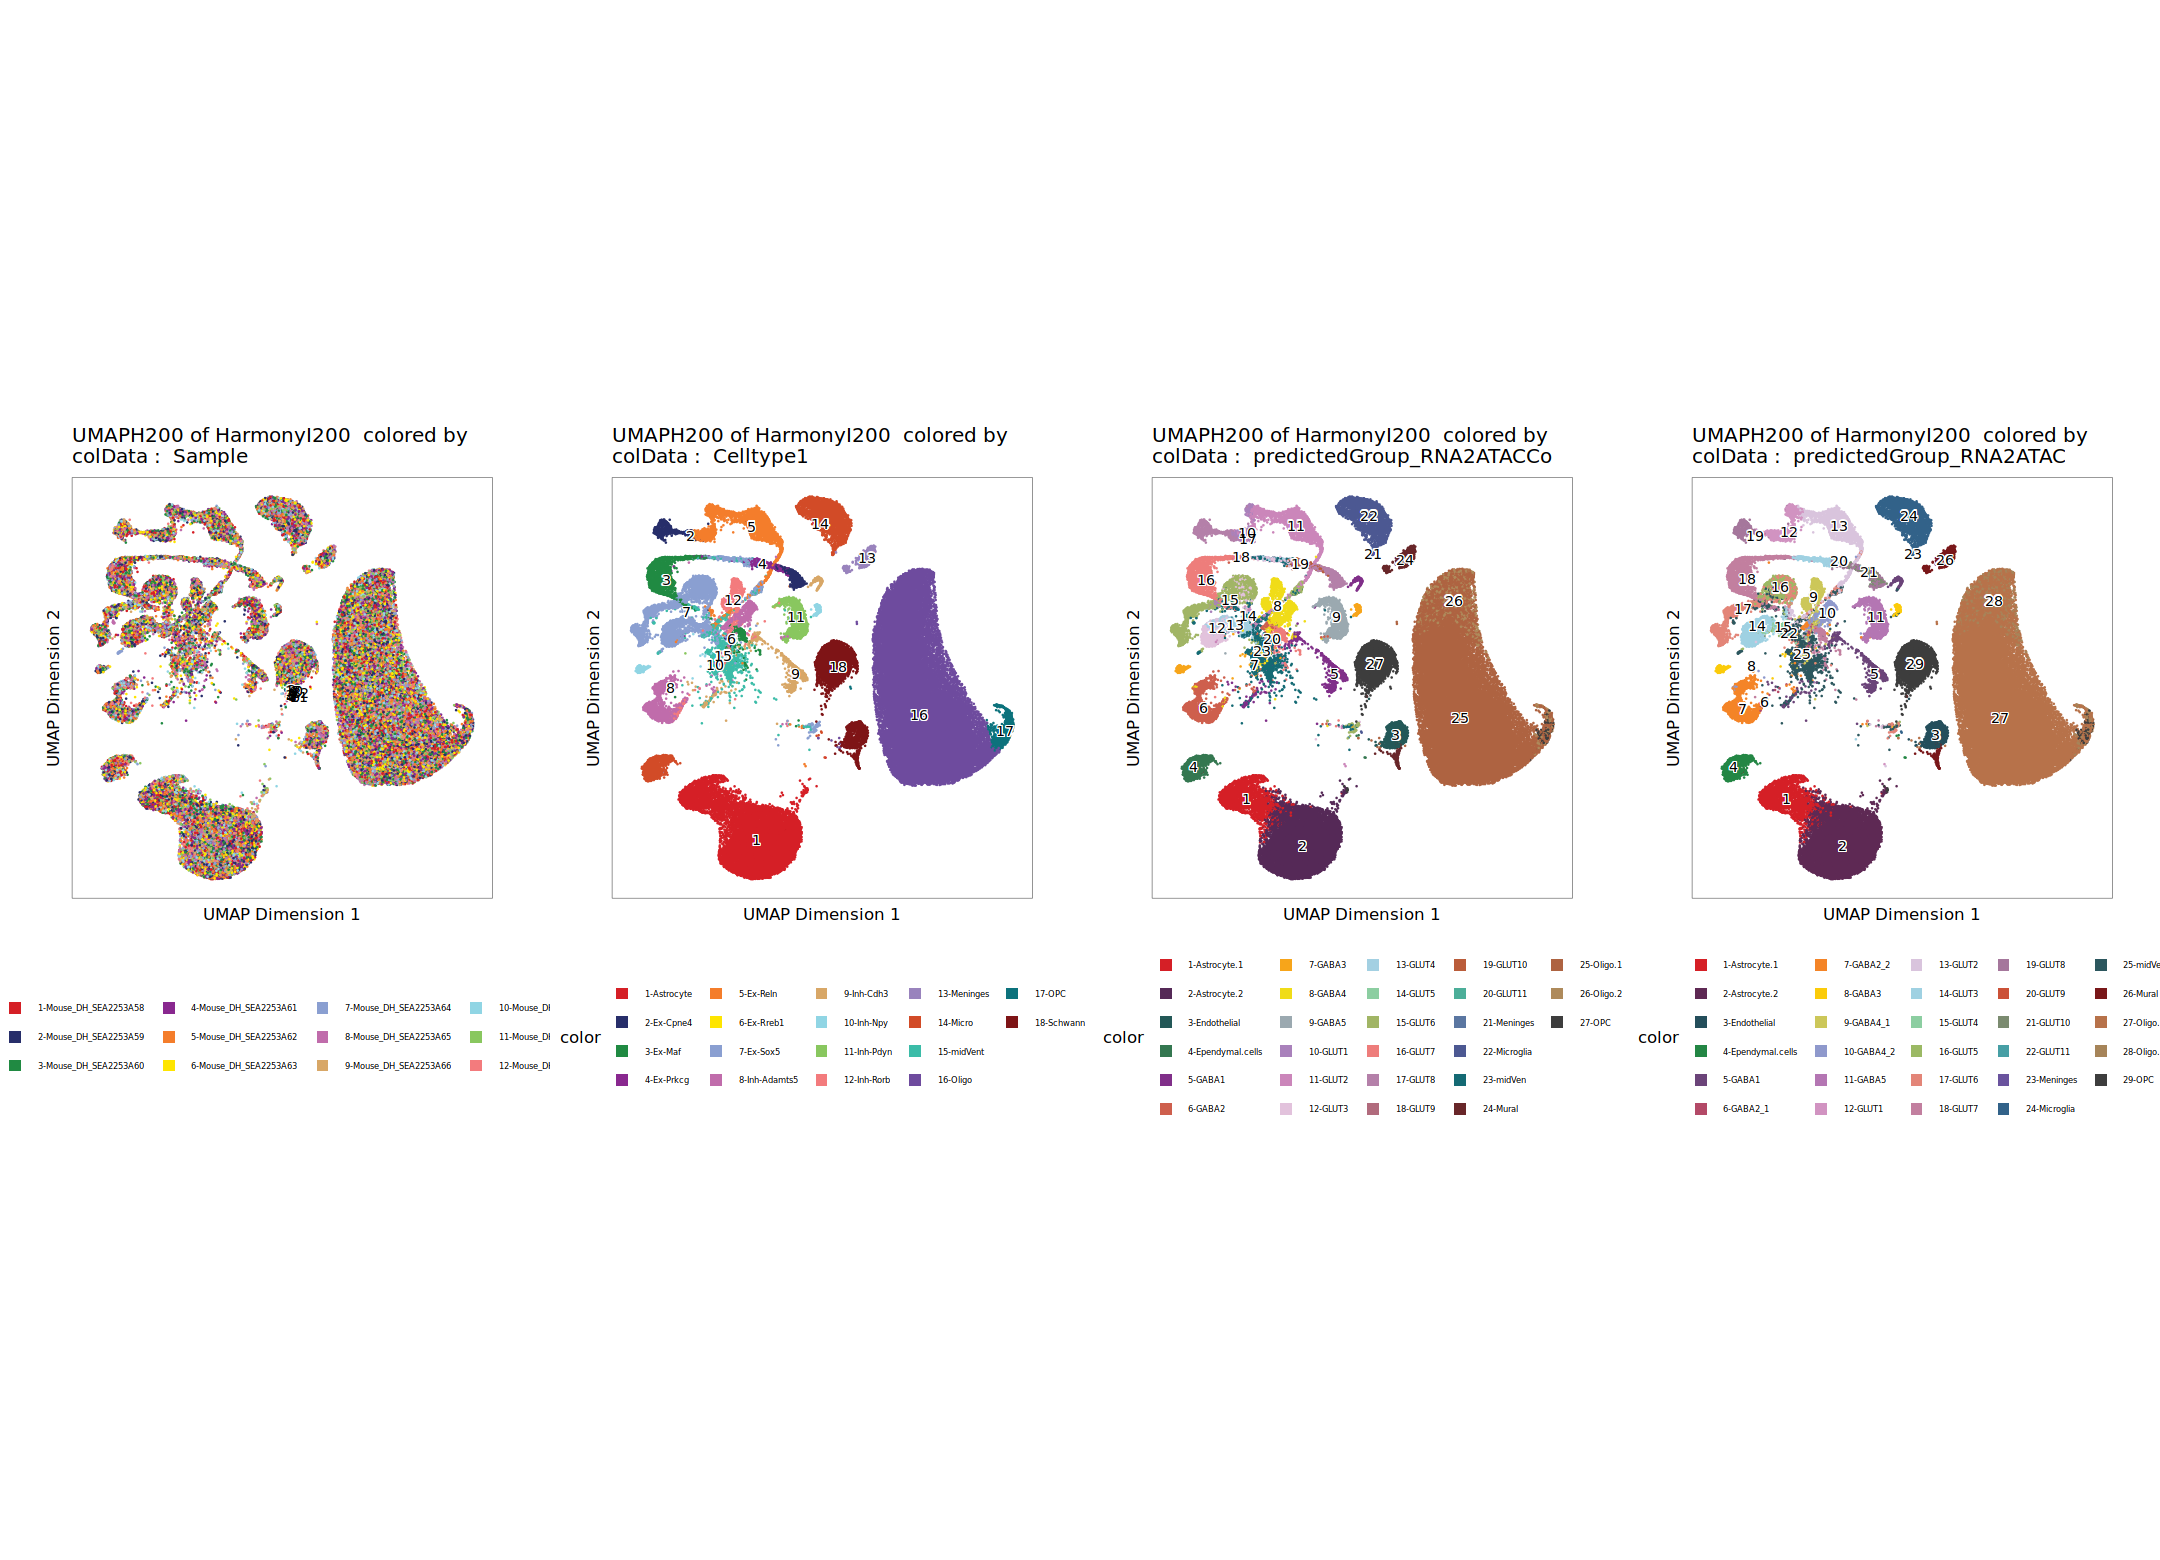

In [15]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sample", embedding = "UMAPH200")

p2 <- plotEmbedding(proj, colorBy = "cellColData", 
                    name = "Celltype1", embedding = "UMAPH200")

p3 <- plotEmbedding(proj, colorBy = "cellColData", 
                    name = "predictedGroup_RNA2ATACCo", embedding = "UMAPH200")

p4 <- plotEmbedding(proj, colorBy = "cellColData", 
                    name = "predictedGroup_RNA2ATAC", embedding = "UMAPH200")


ggAlignPlots(p1, p2, p3, p4,  type = "h")

In [22]:
proj <- addImputeWeights(proj, reducedDims = "HarmonyI200")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-5b3435d52c362-Date-2023-01-30_Time-10-51-35.log
If there is an issue, please report to github with logFile!

2023-01-30 10:51:38 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e6bcd96e4-Date-2022-10-21_Time-10-08-59.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-21 10:09:01 : 



Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e6bcd96e4-Date-2022-10-21_Time-10-08-59.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


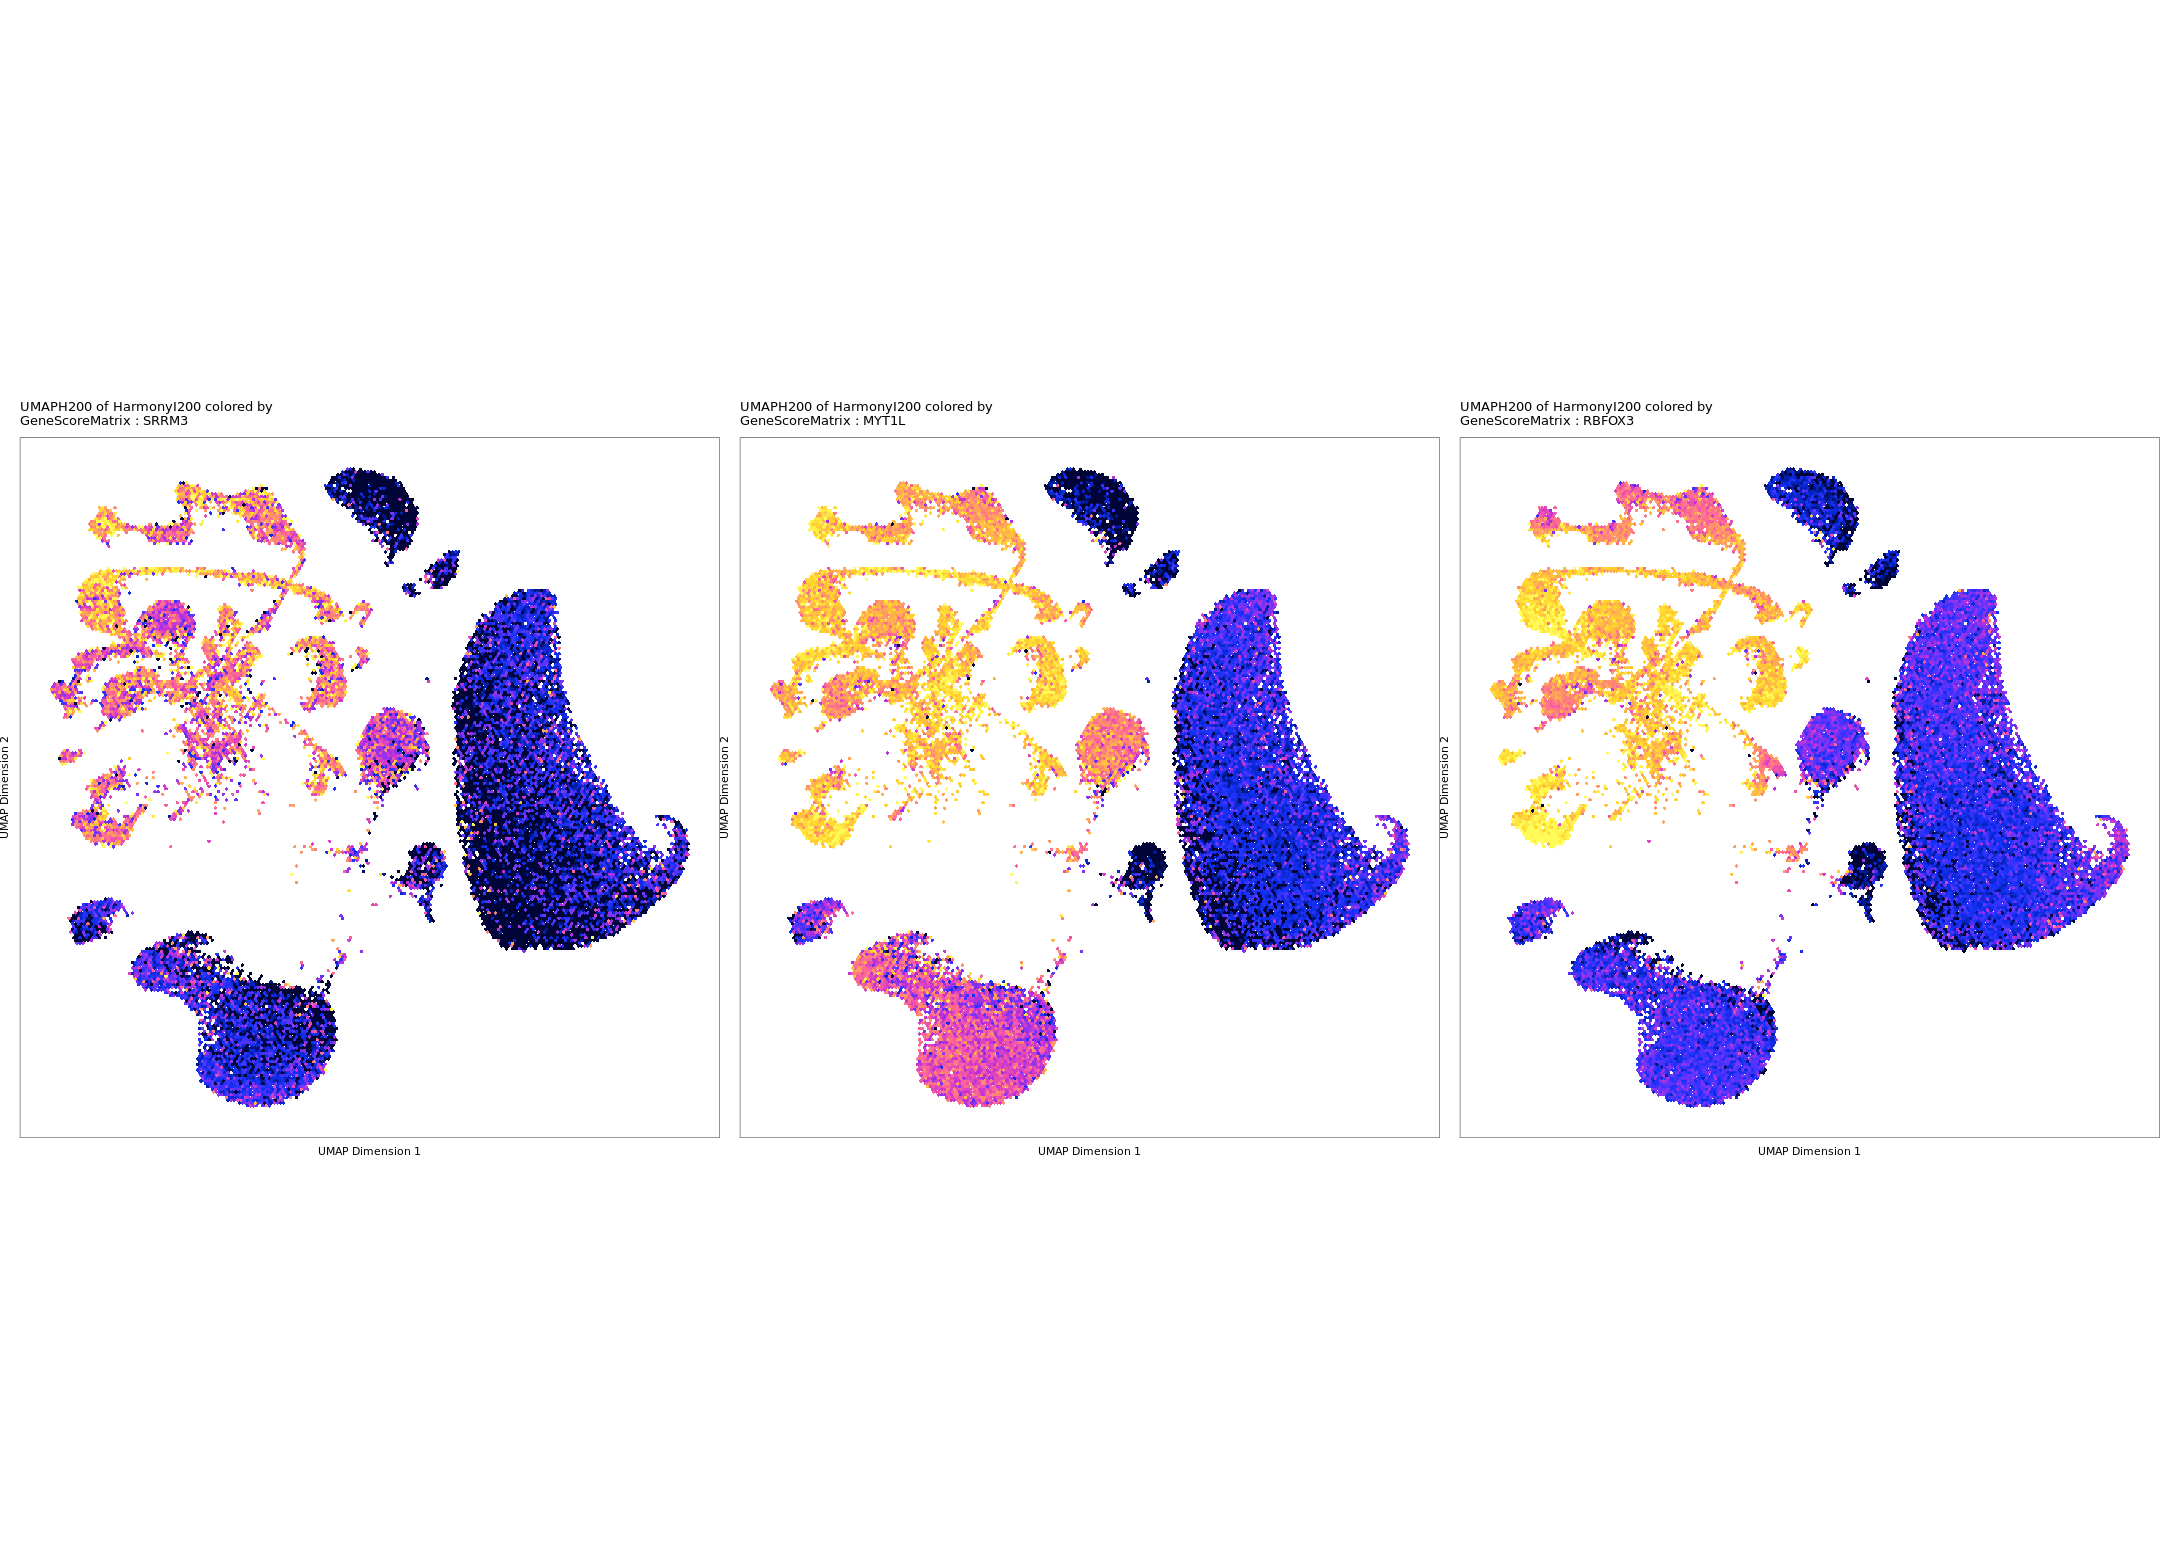

In [19]:
## Neuron vs. Glia markers
markerGenes1  <- c('SRRM3',#Neurons
                   'MYT1L',#Neurons
                   'RBFOX3'#Neurons
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-5b3434dab729e-Date-2023-01-30_Time-10-38-51.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2023-01-30 10:39:43 : 



Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-5b3434dab729e-Date-2023-01-30_Time-10-38-51.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


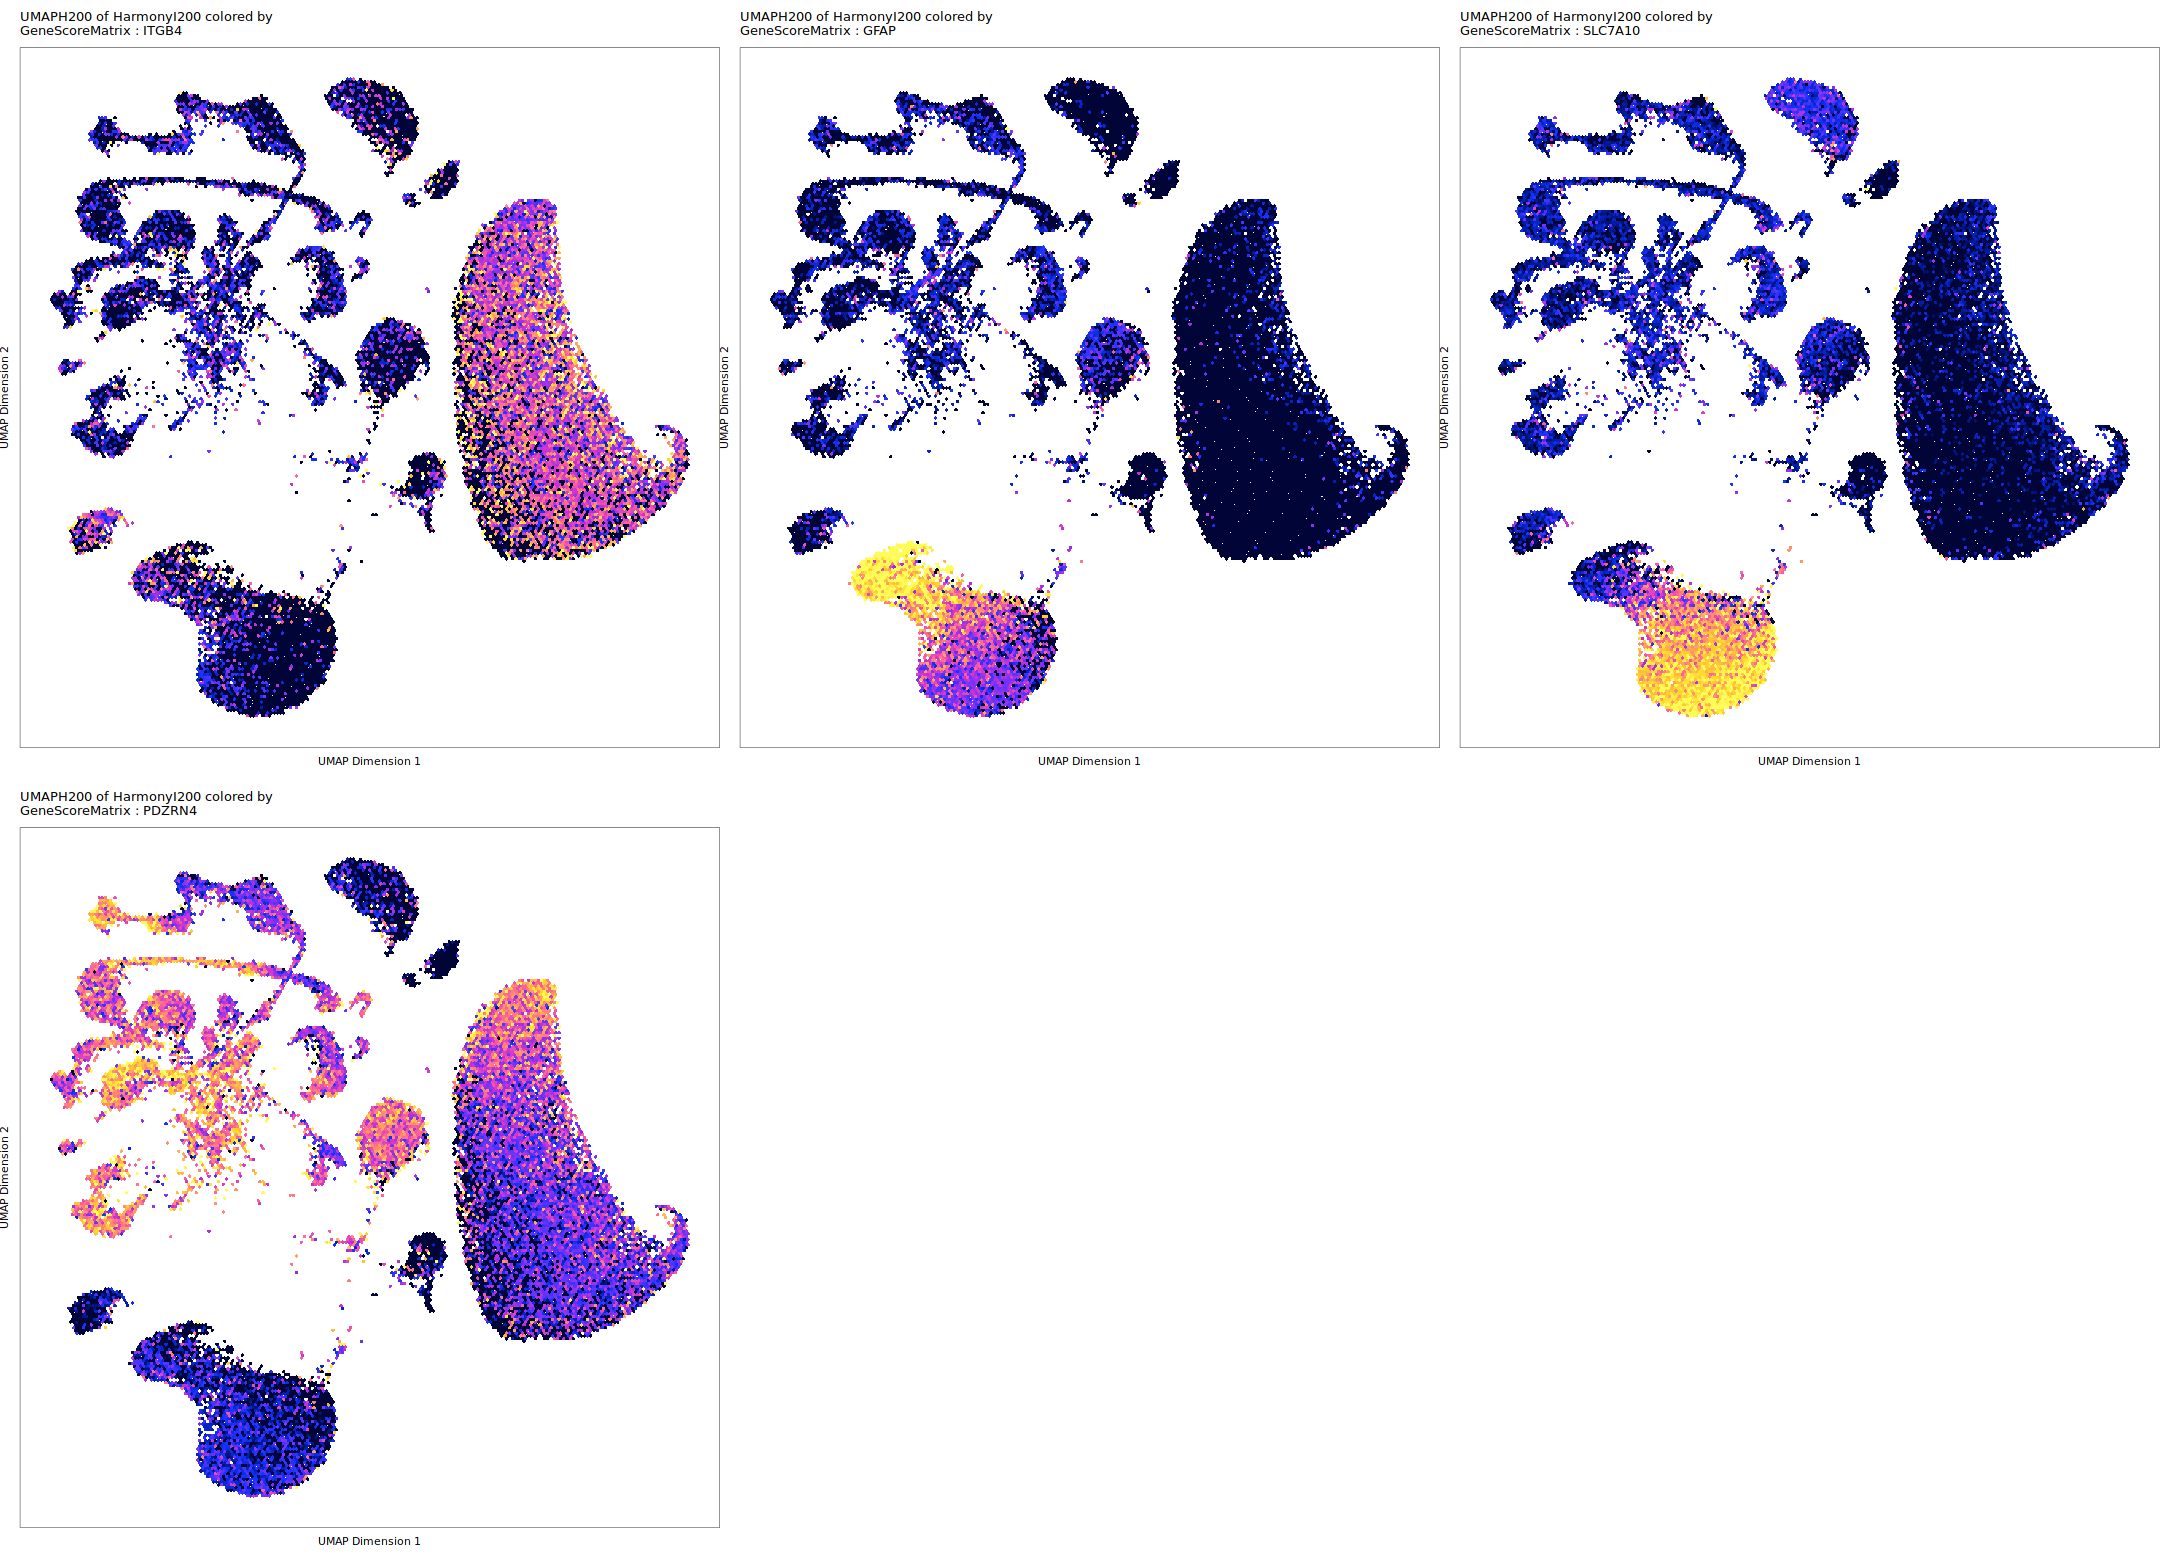

In [18]:
## Neuron vs. Glia markers
markerGenes1  <- c('ITGB4',#Astrocyte1
                   'GFAP',#Astrocyte1
                   'SLC7A10',#Astrocyte2
                   'PDZRN4'#Astrocyte2
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

In [36]:
## Neuron vs. Glia markers
markerGenes1  <- c('RFX2'#Ependymal 
#                    'DNAH12'#Ependymal 
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e227ae1be-Date-2022-10-21_Time-10-22-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-21 10:22:58 : 



Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e227ae1be-Date-2022-10-21_Time-10-22-57.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


ERROR: Error in x + guides(color = FALSE, fill = FALSE): non-numeric argument to binary operator


Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-5b34352a6a59c-Date-2023-01-30_Time-10-40-56.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2023-01-30 10:41:19 : 



Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-5b34352a6a59c-Date-2023-01-30_Time-10-40-56.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


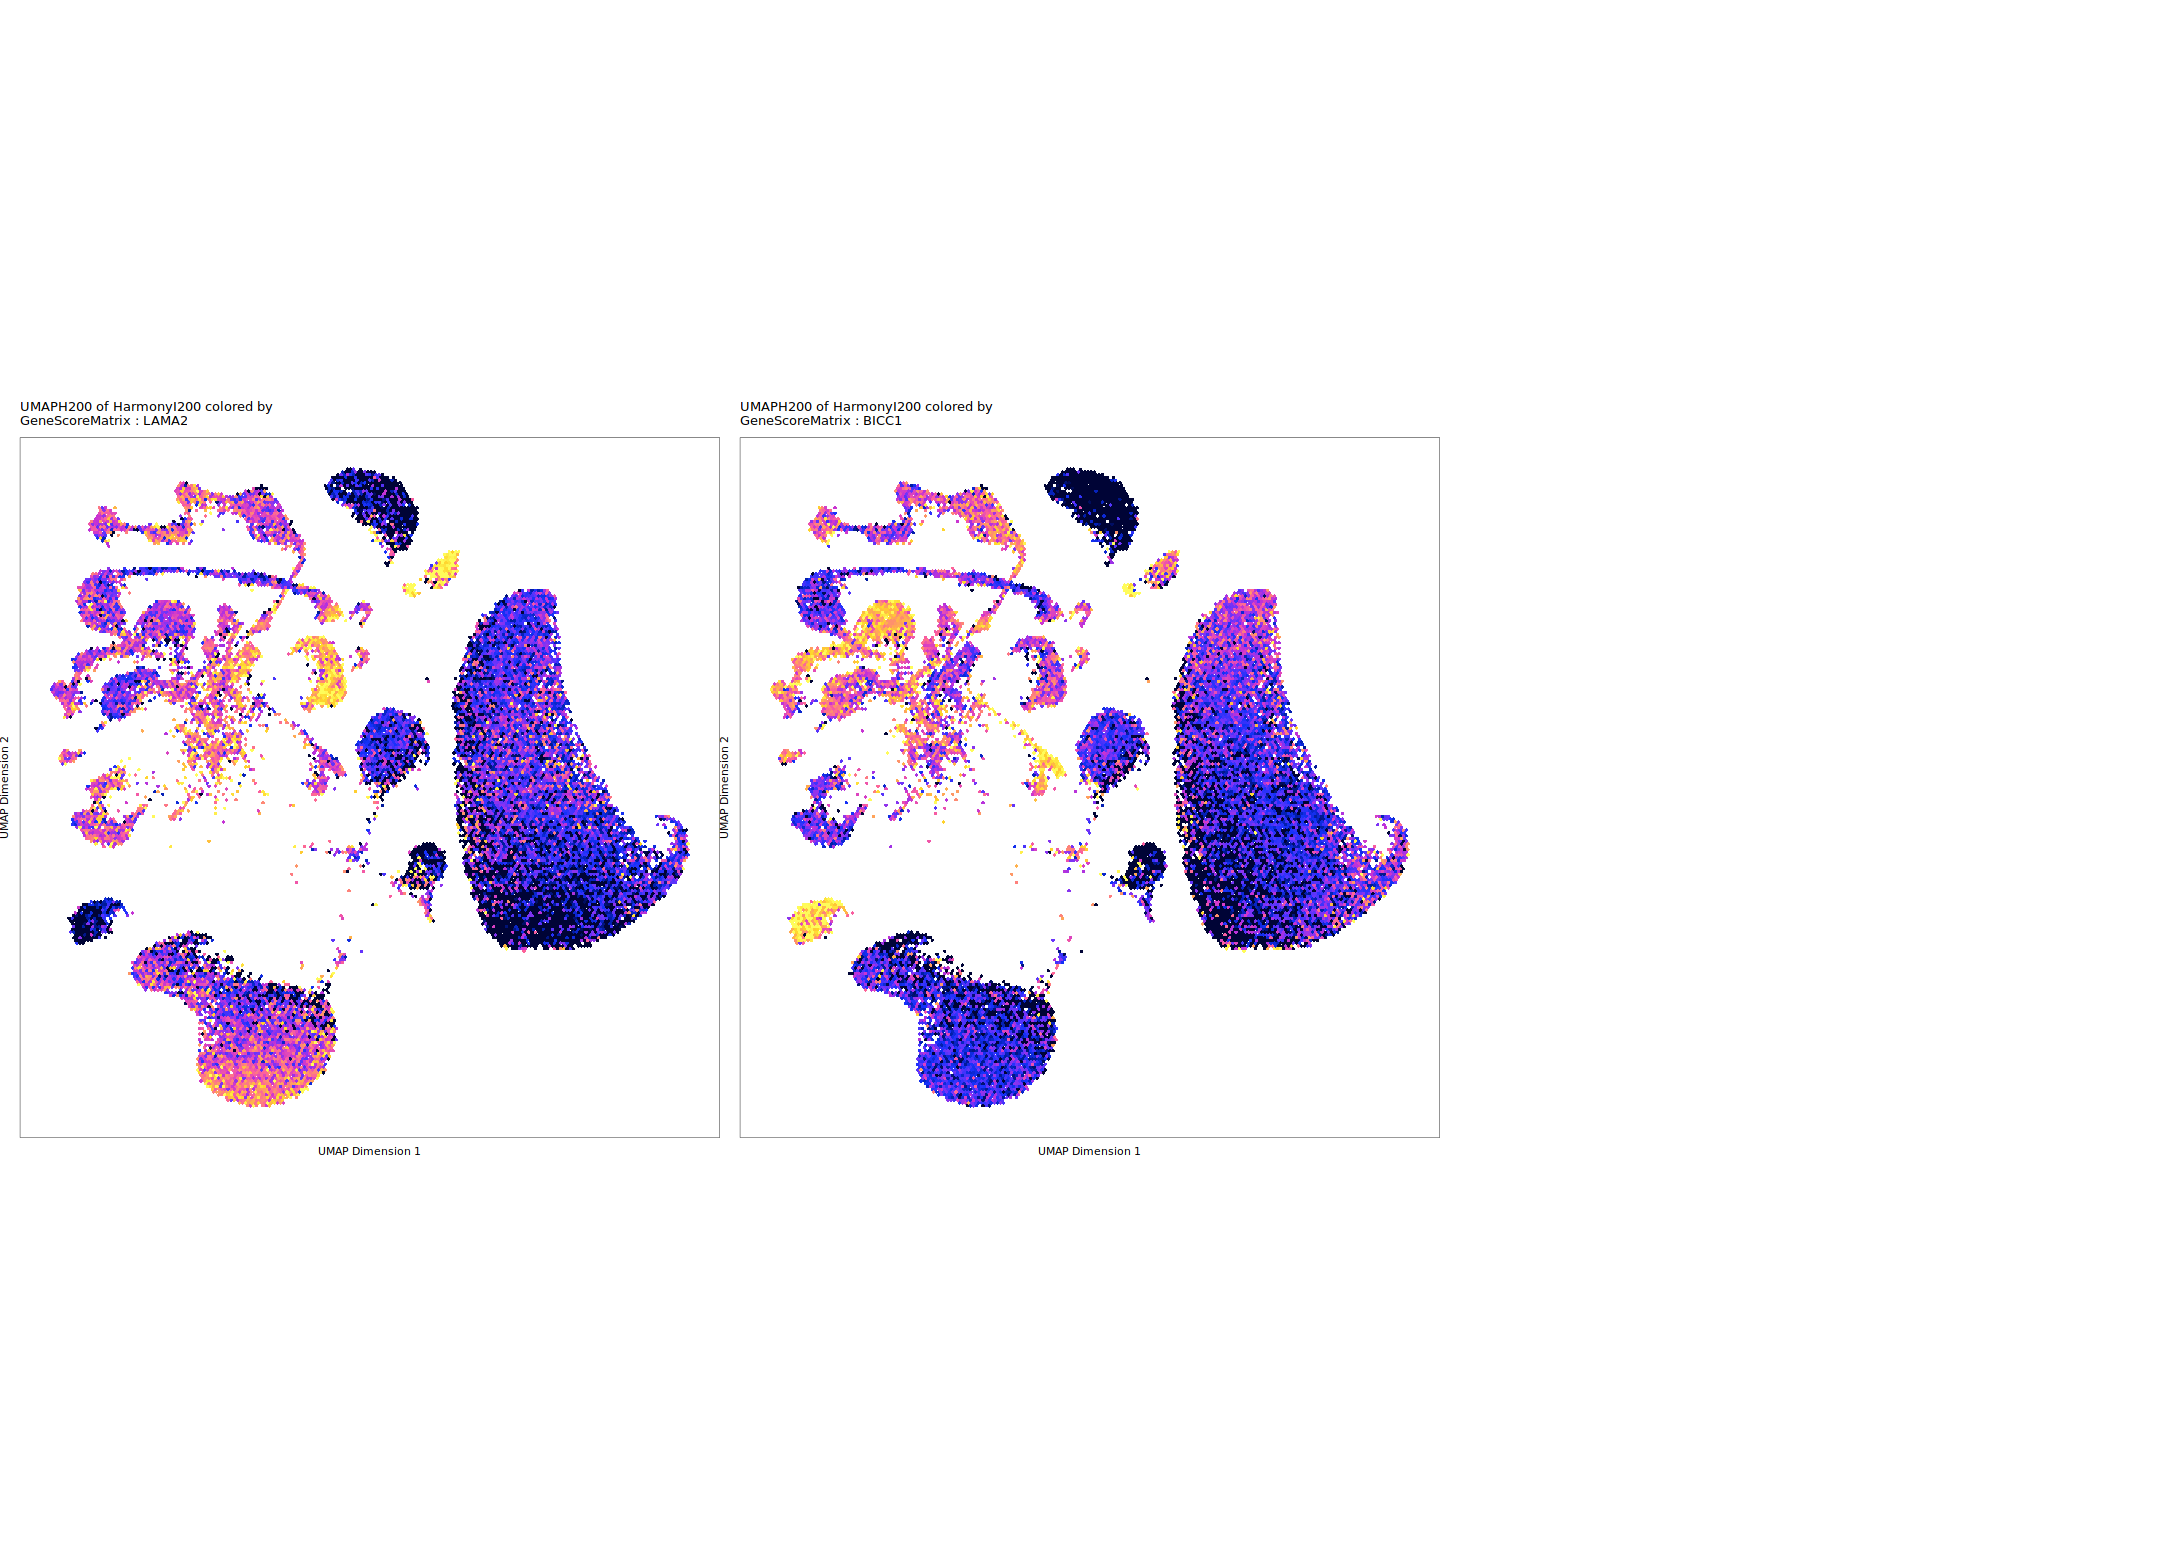

In [19]:
## Neuron vs. Glia markers
markerGenes1  <- c('LAMA2',#Meninges
                   'BICC1'#Meninges
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

In [4]:
## Neuron vs. Glia markers
markerGenes1  <- c('Flt1',#Endothelial
                   'Notch3'#Mural
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-41a44169b6b4-Date-2023-02-15_Time-10-12-05.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneIntegrationMatrix

Getting Matrix Values...

2023-02-15 10:12:13 : 

Warning message in mclapply(..., mc.cores = threads, mc.preschedule = preschedule):
“12 function calls resulted in an error”


ERROR: Error in .safelapply(seq_along(cellNamesList), function(x) {: 
Error Found Iteration 1 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 2 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 3 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 4 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 5 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 6 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 7 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 8 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 9 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 10 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 11 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 12 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>



Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e28130342-Date-2022-10-21_Time-10-22-07.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-21 10:22:10 : 



Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e28130342-Date-2022-10-21_Time-10-22-07.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


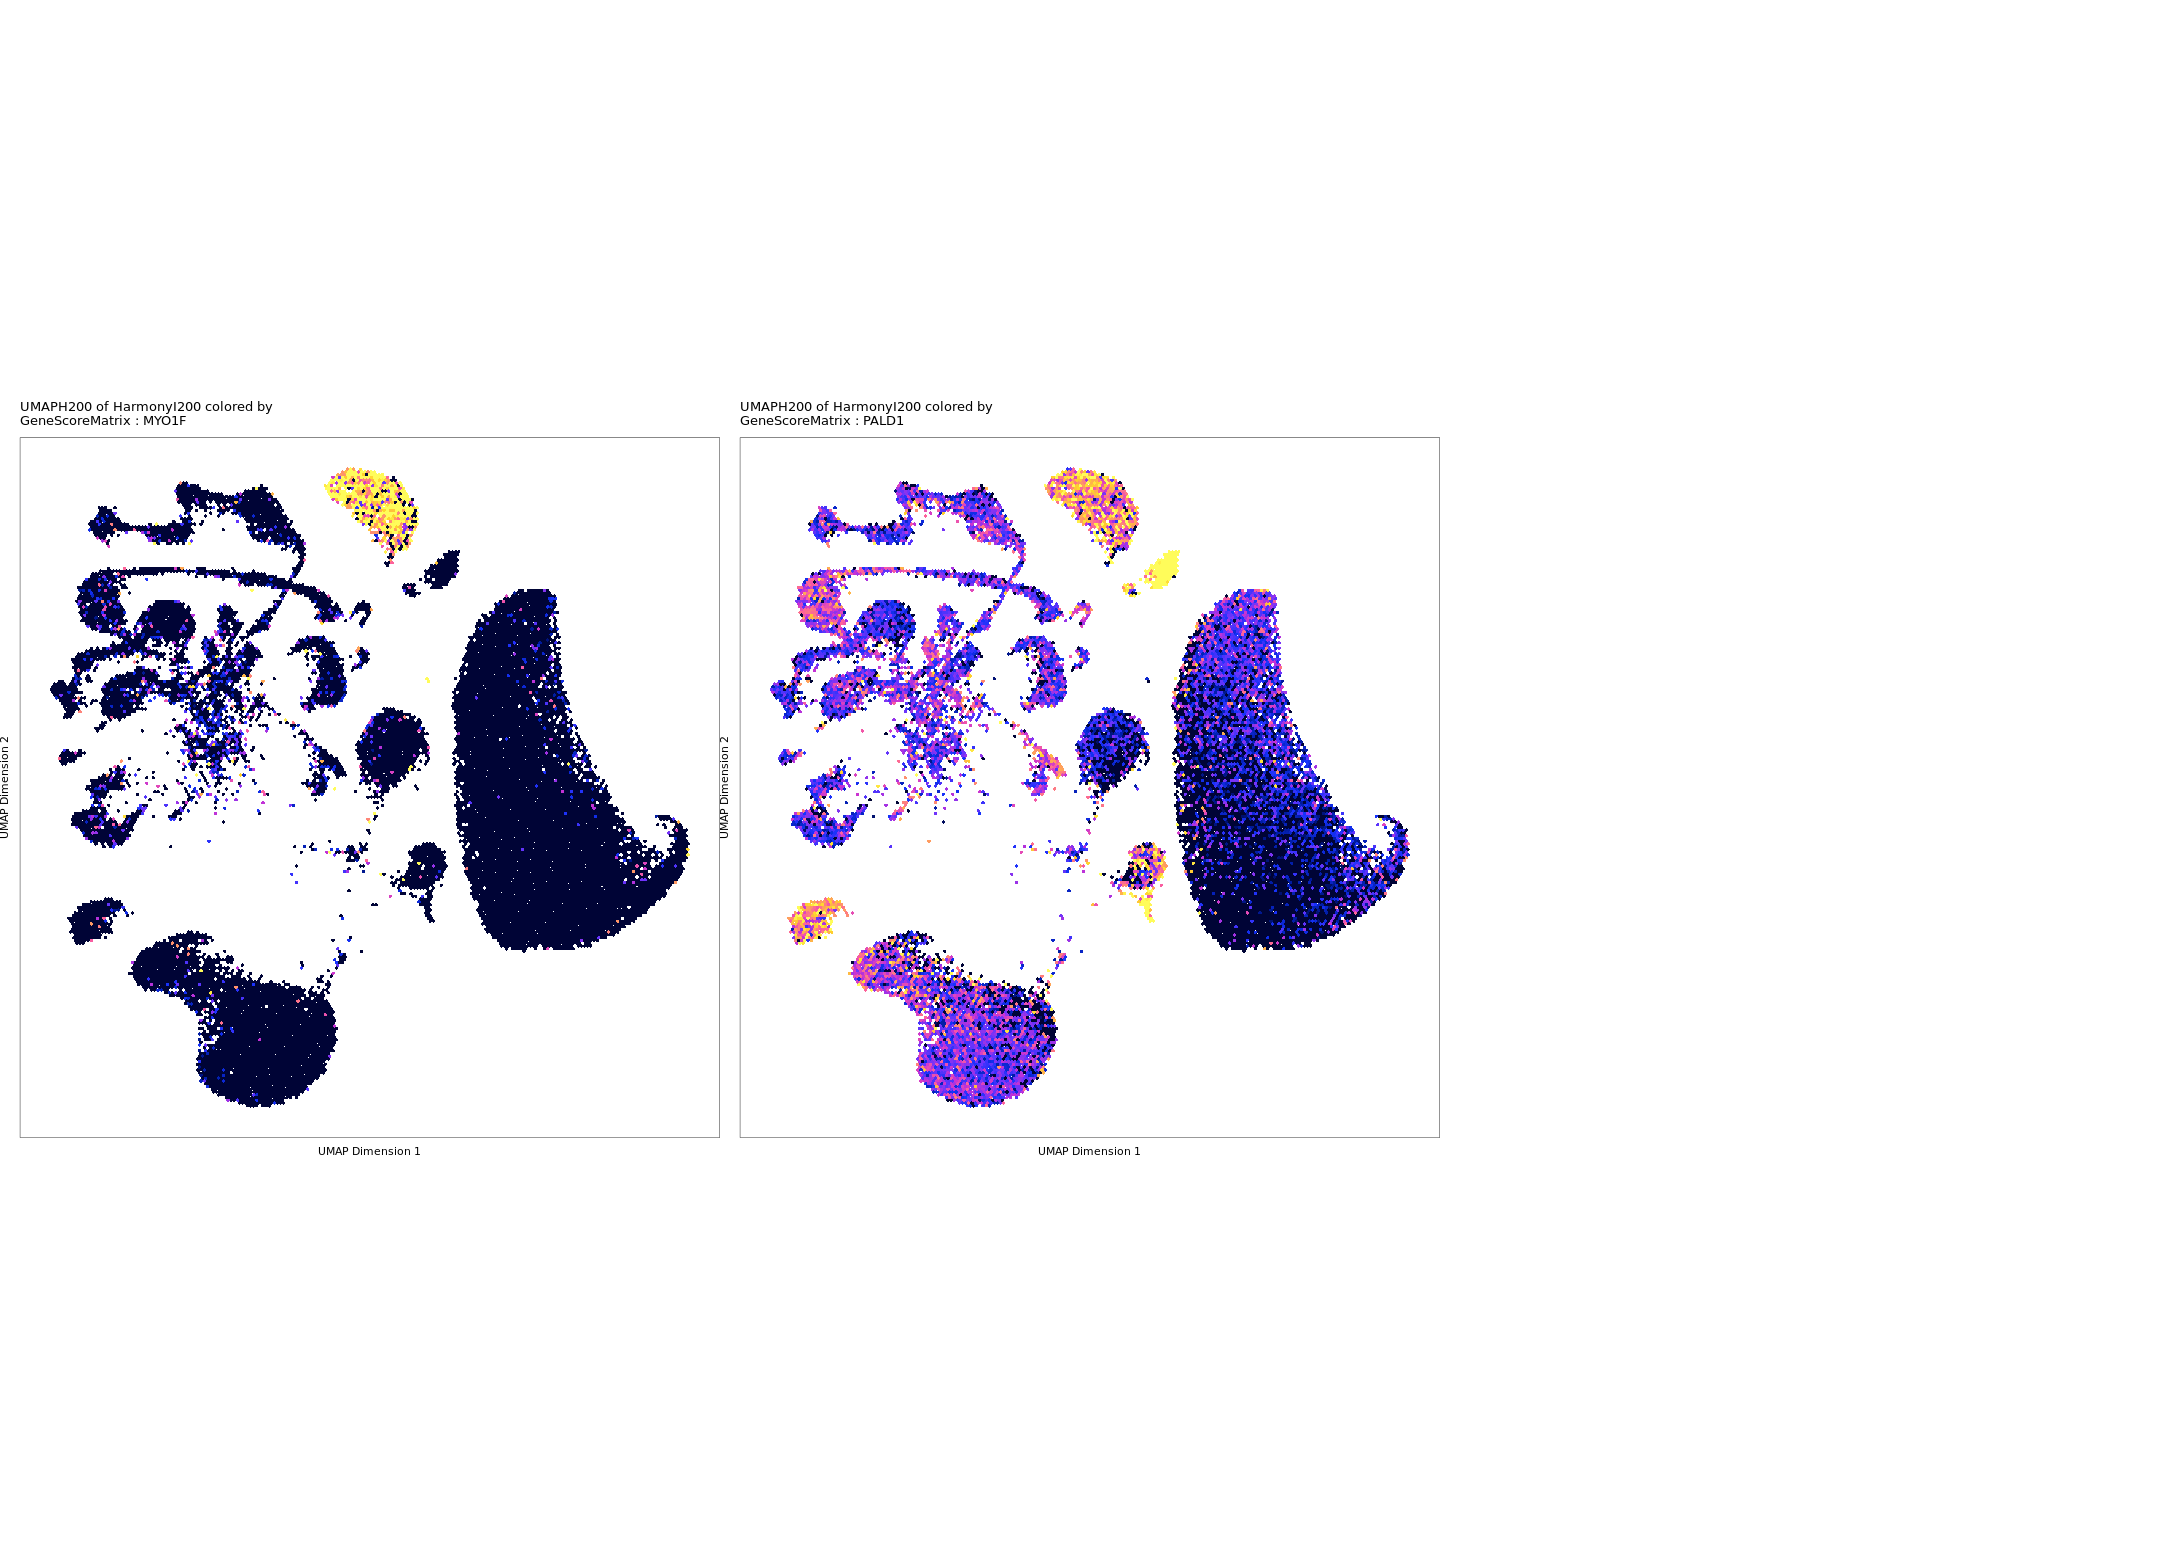

In [34]:
## Neuron vs. Glia markers
markerGenes1  <- c('MYO1F',#Microglia
                   'PALD1' #Microglia
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7ede42222-Date-2022-10-21_Time-10-21-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-21 10:21:38 : 



Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7ede42222-Date-2022-10-21_Time-10-21-37.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


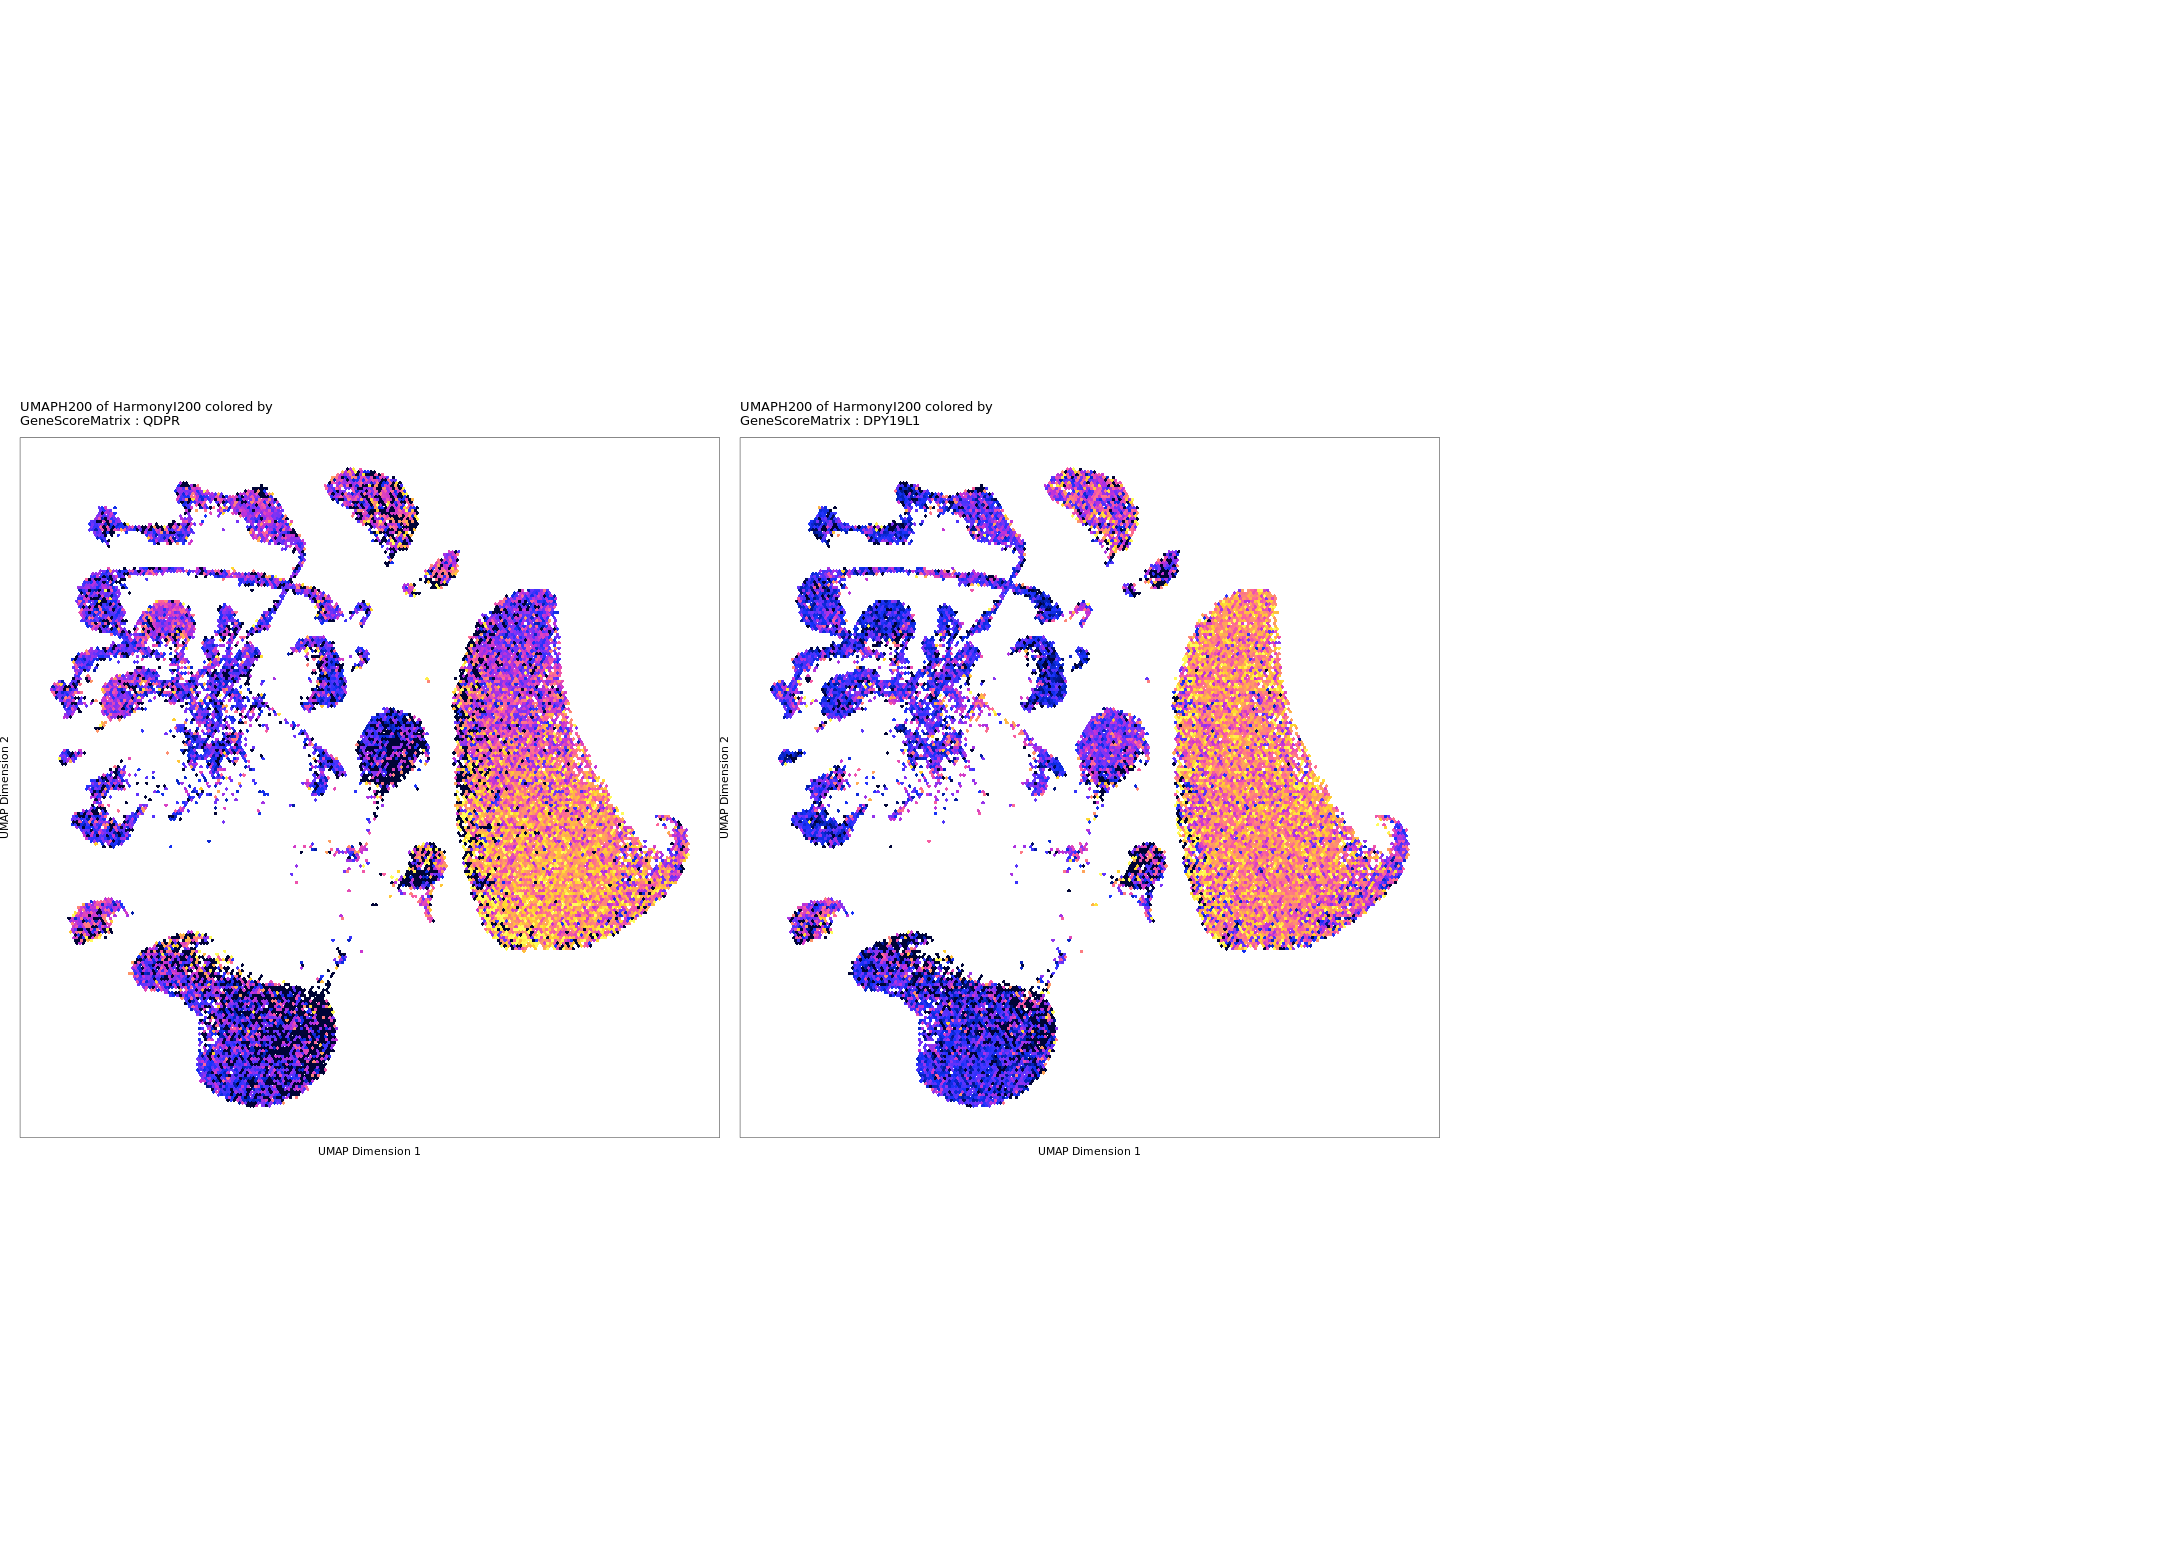

In [33]:
## Neuron vs. Glia markers
markerGenes1  <- c('QDPR',#Oligo1
                   'DPY19L1'#Oligo2
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e374b11be-Date-2022-10-21_Time-10-21-08.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-21 10:21:11 : 



Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e374b11be-Date-2022-10-21_Time-10-21-08.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


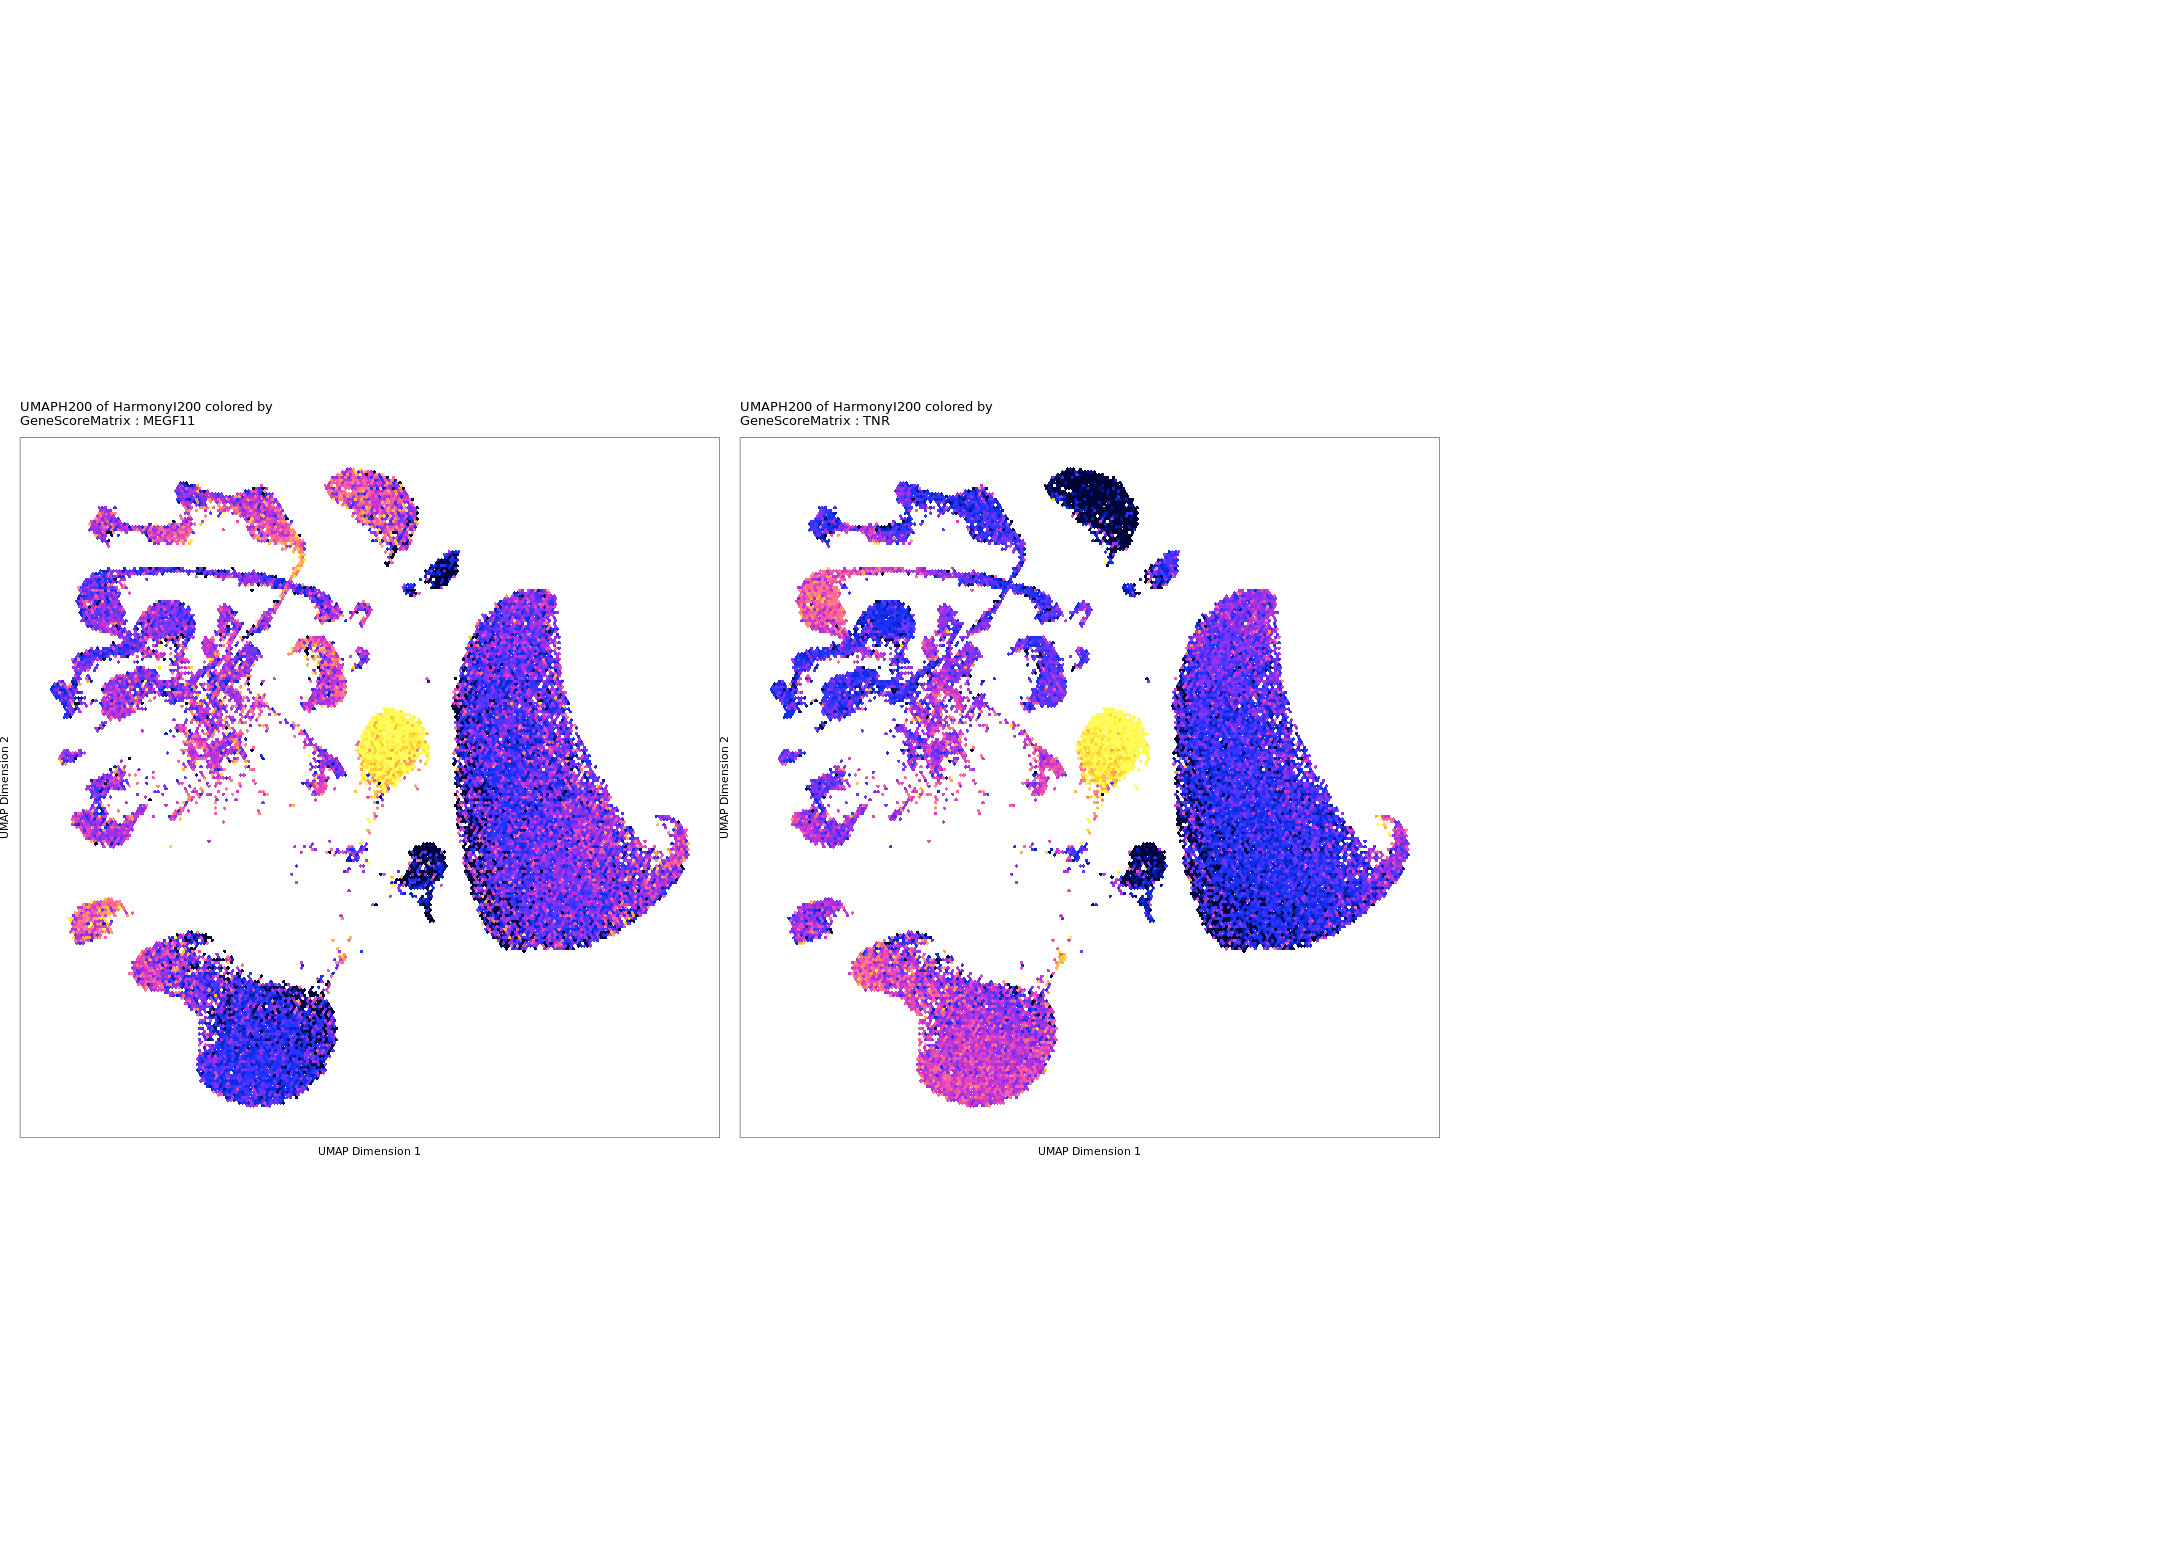

In [32]:
## Neuron vs. Glia markers
markerGenes1  <- c('MEGF11',#OPC
                   'TNR'#OPC
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e2195493-Date-2022-10-21_Time-10-13-35.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-21 10:13:38 : 



Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e2195493-Date-2022-10-21_Time-10-13-35.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


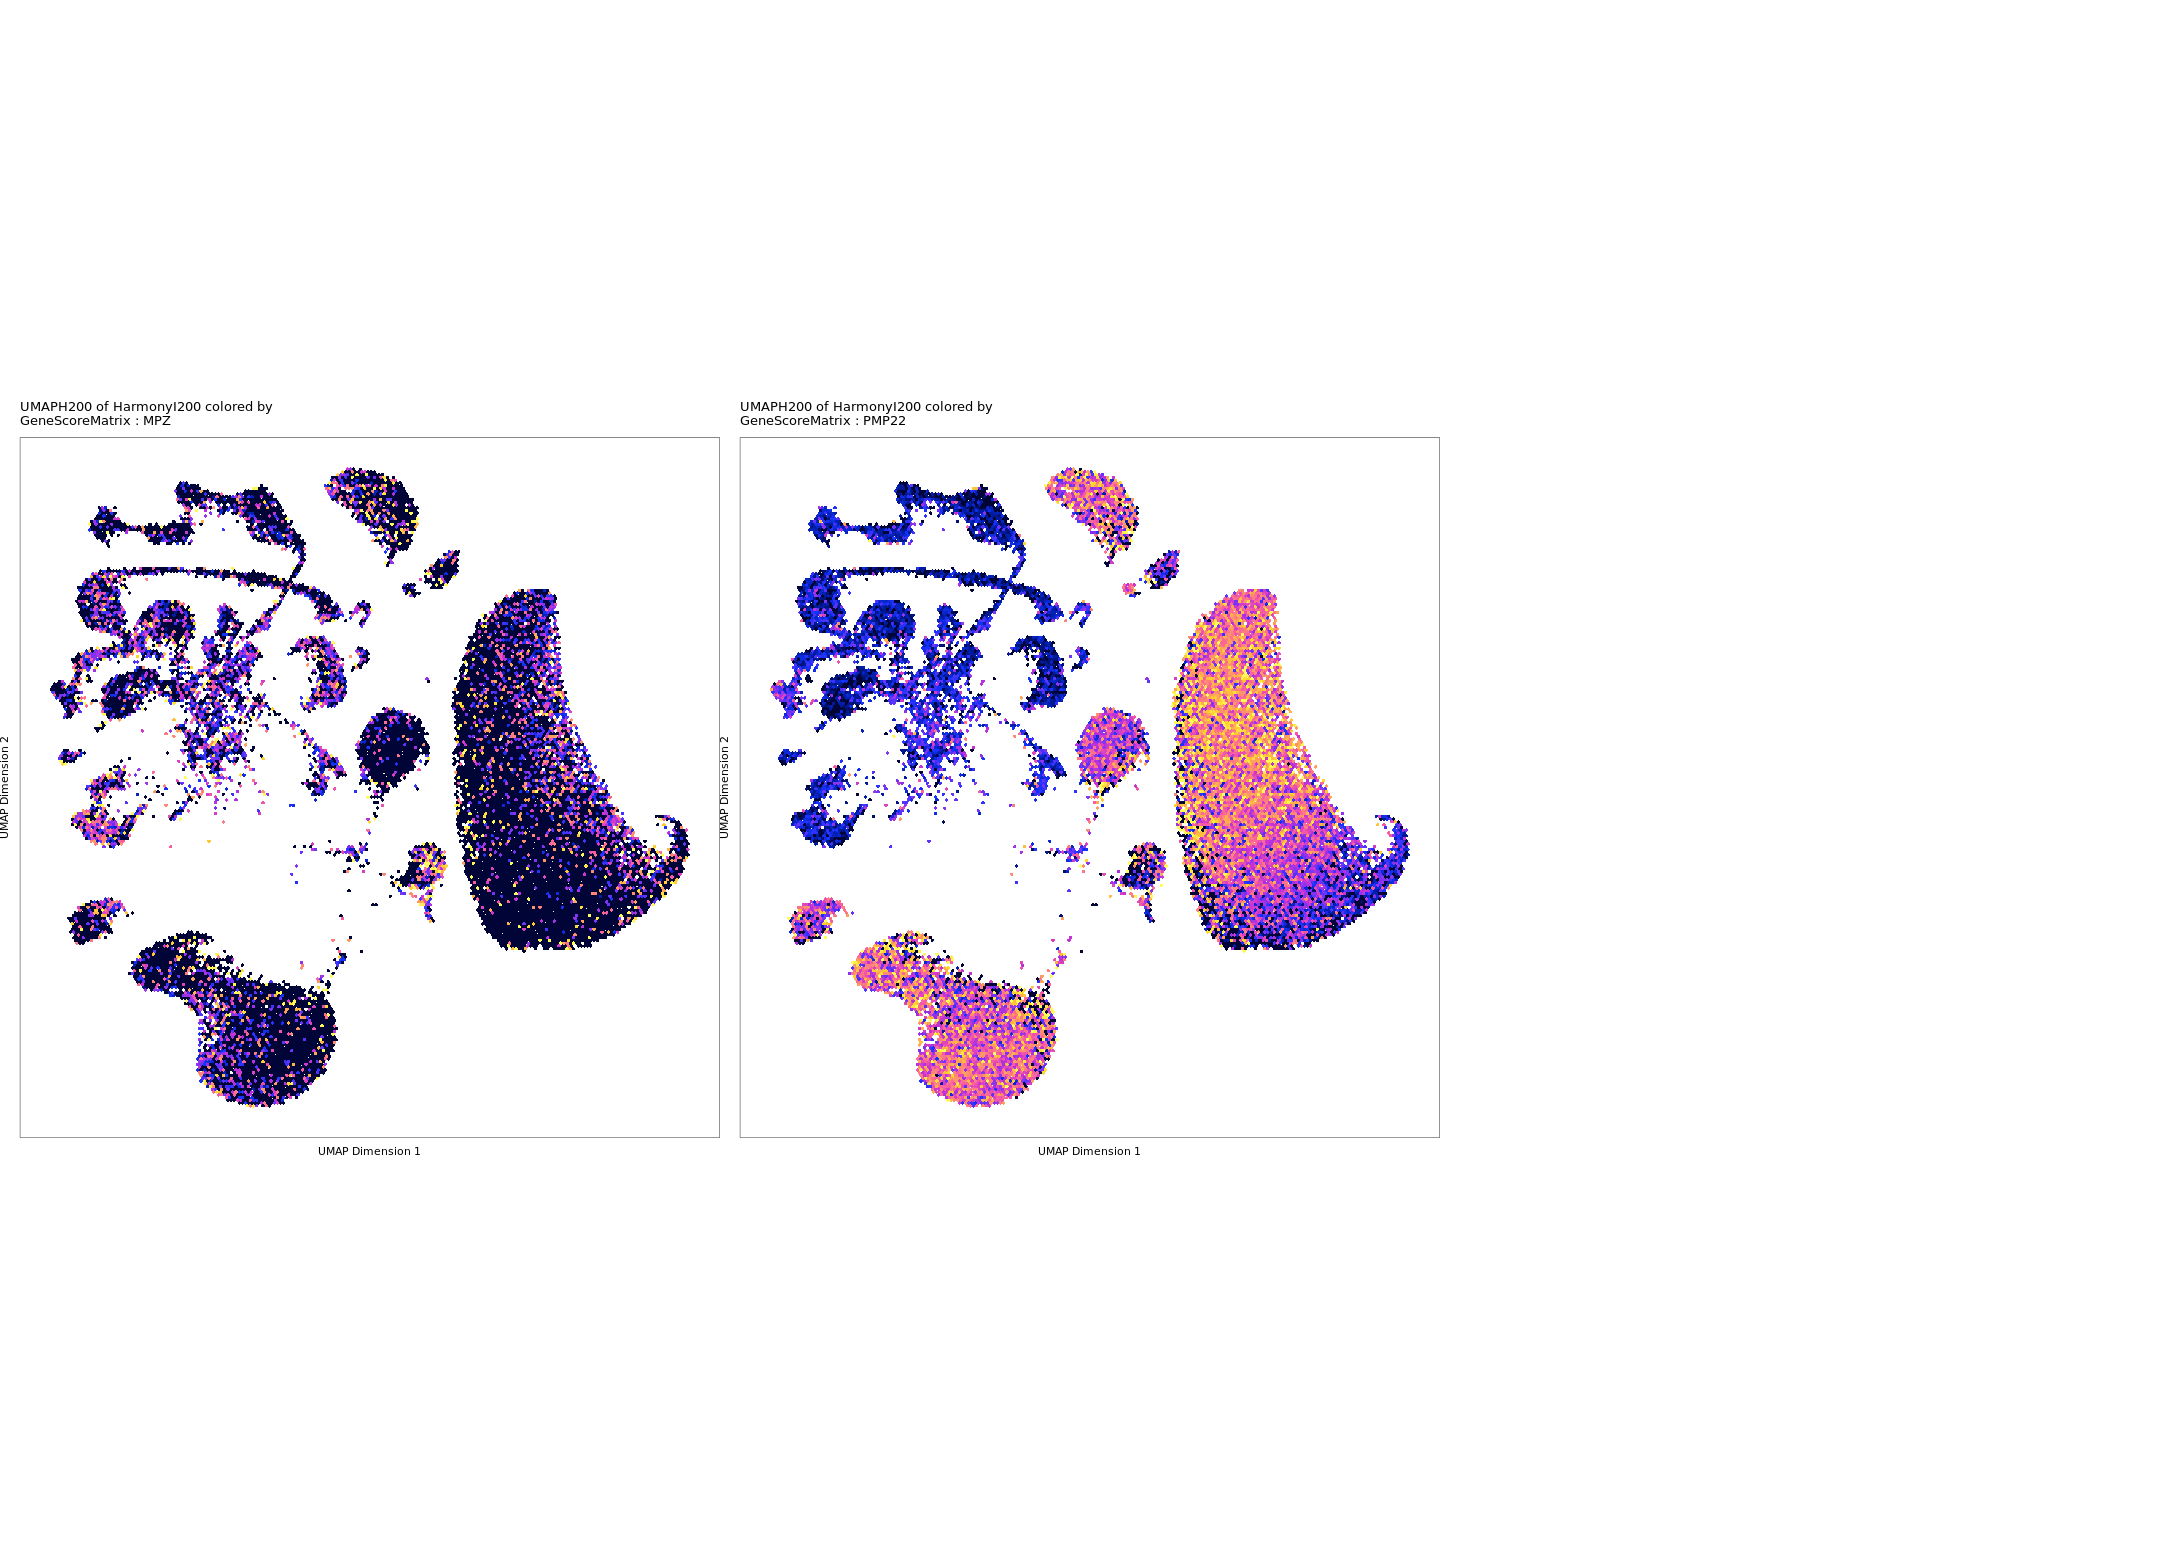

In [25]:
## Neuron vs. Glia markers
markerGenes1  <- c('MPZ',#Schwann
                   'PMP22'#Schwann
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e918fa13-Date-2022-10-21_Time-10-14-07.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-21 10:14:10 : 



Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e918fa13-Date-2022-10-21_Time-10-14-07.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


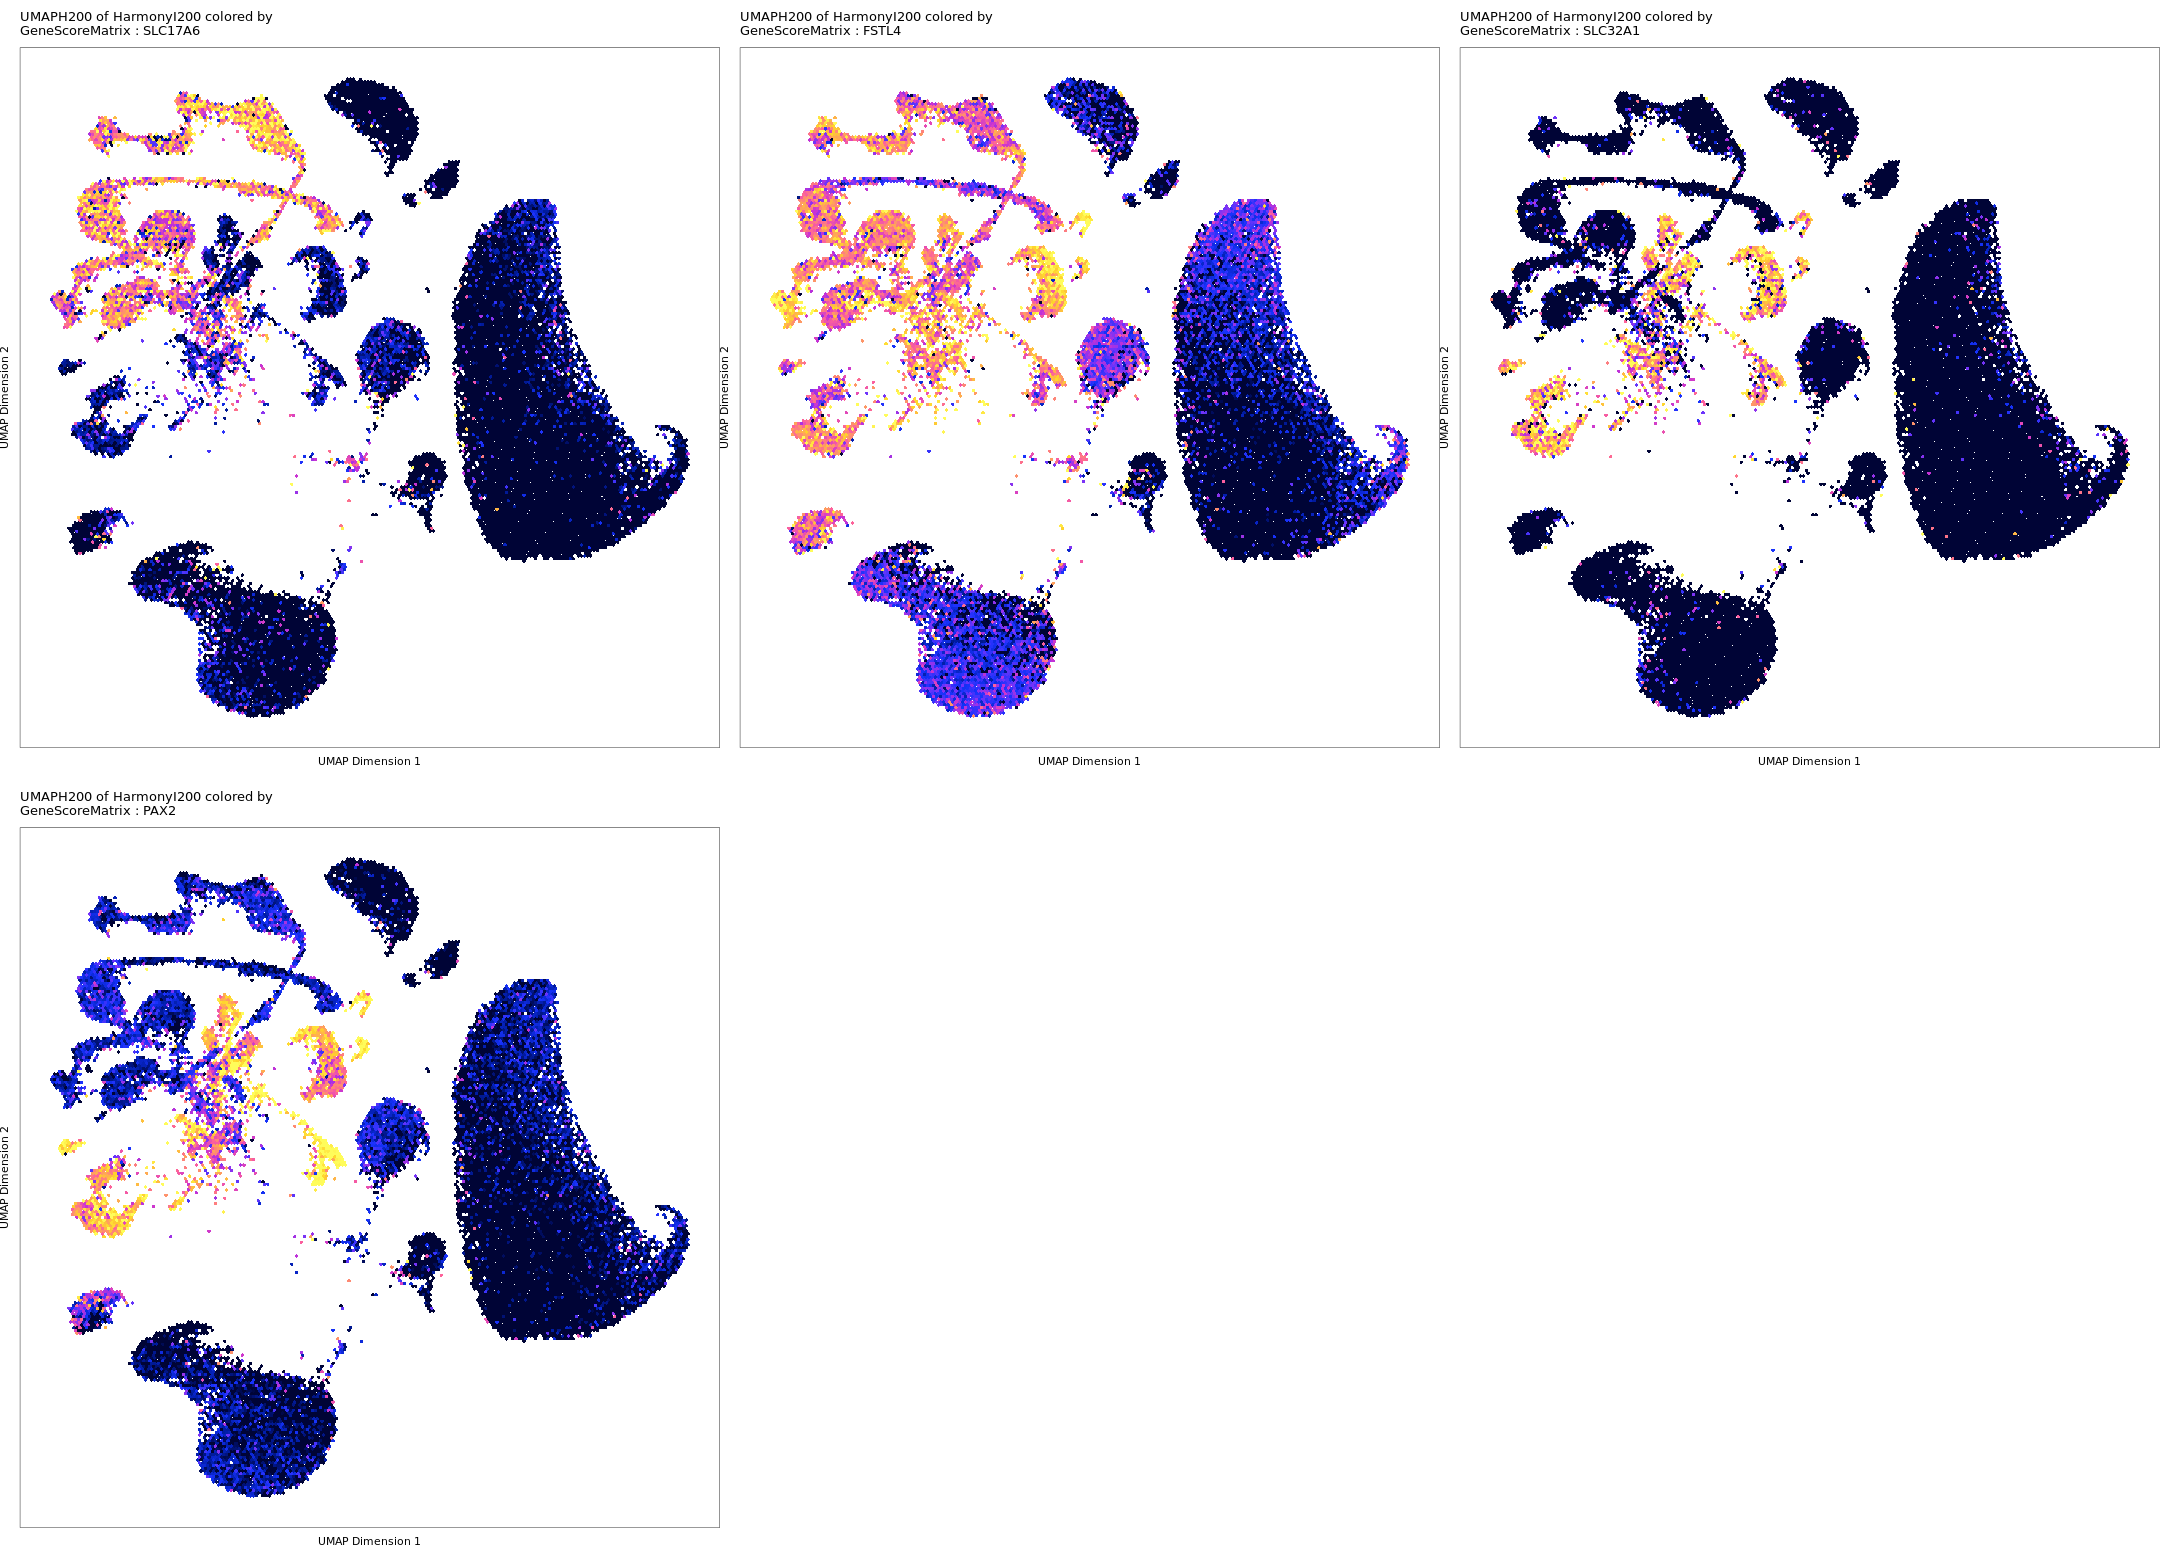

In [26]:
## Excitatory vs. Inhibitory markers
markerGenes1  <- c('SLC17A6','FSTL4', # Excitatory 
                   'SLC32A1','PAX2' # Inhibitory
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e7efe2284-Date-2022-10-21_Time-10-15-05.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-21 10:15:08 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e7efe2284-Date-2022-10-21_Time-10-15-05.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is dep

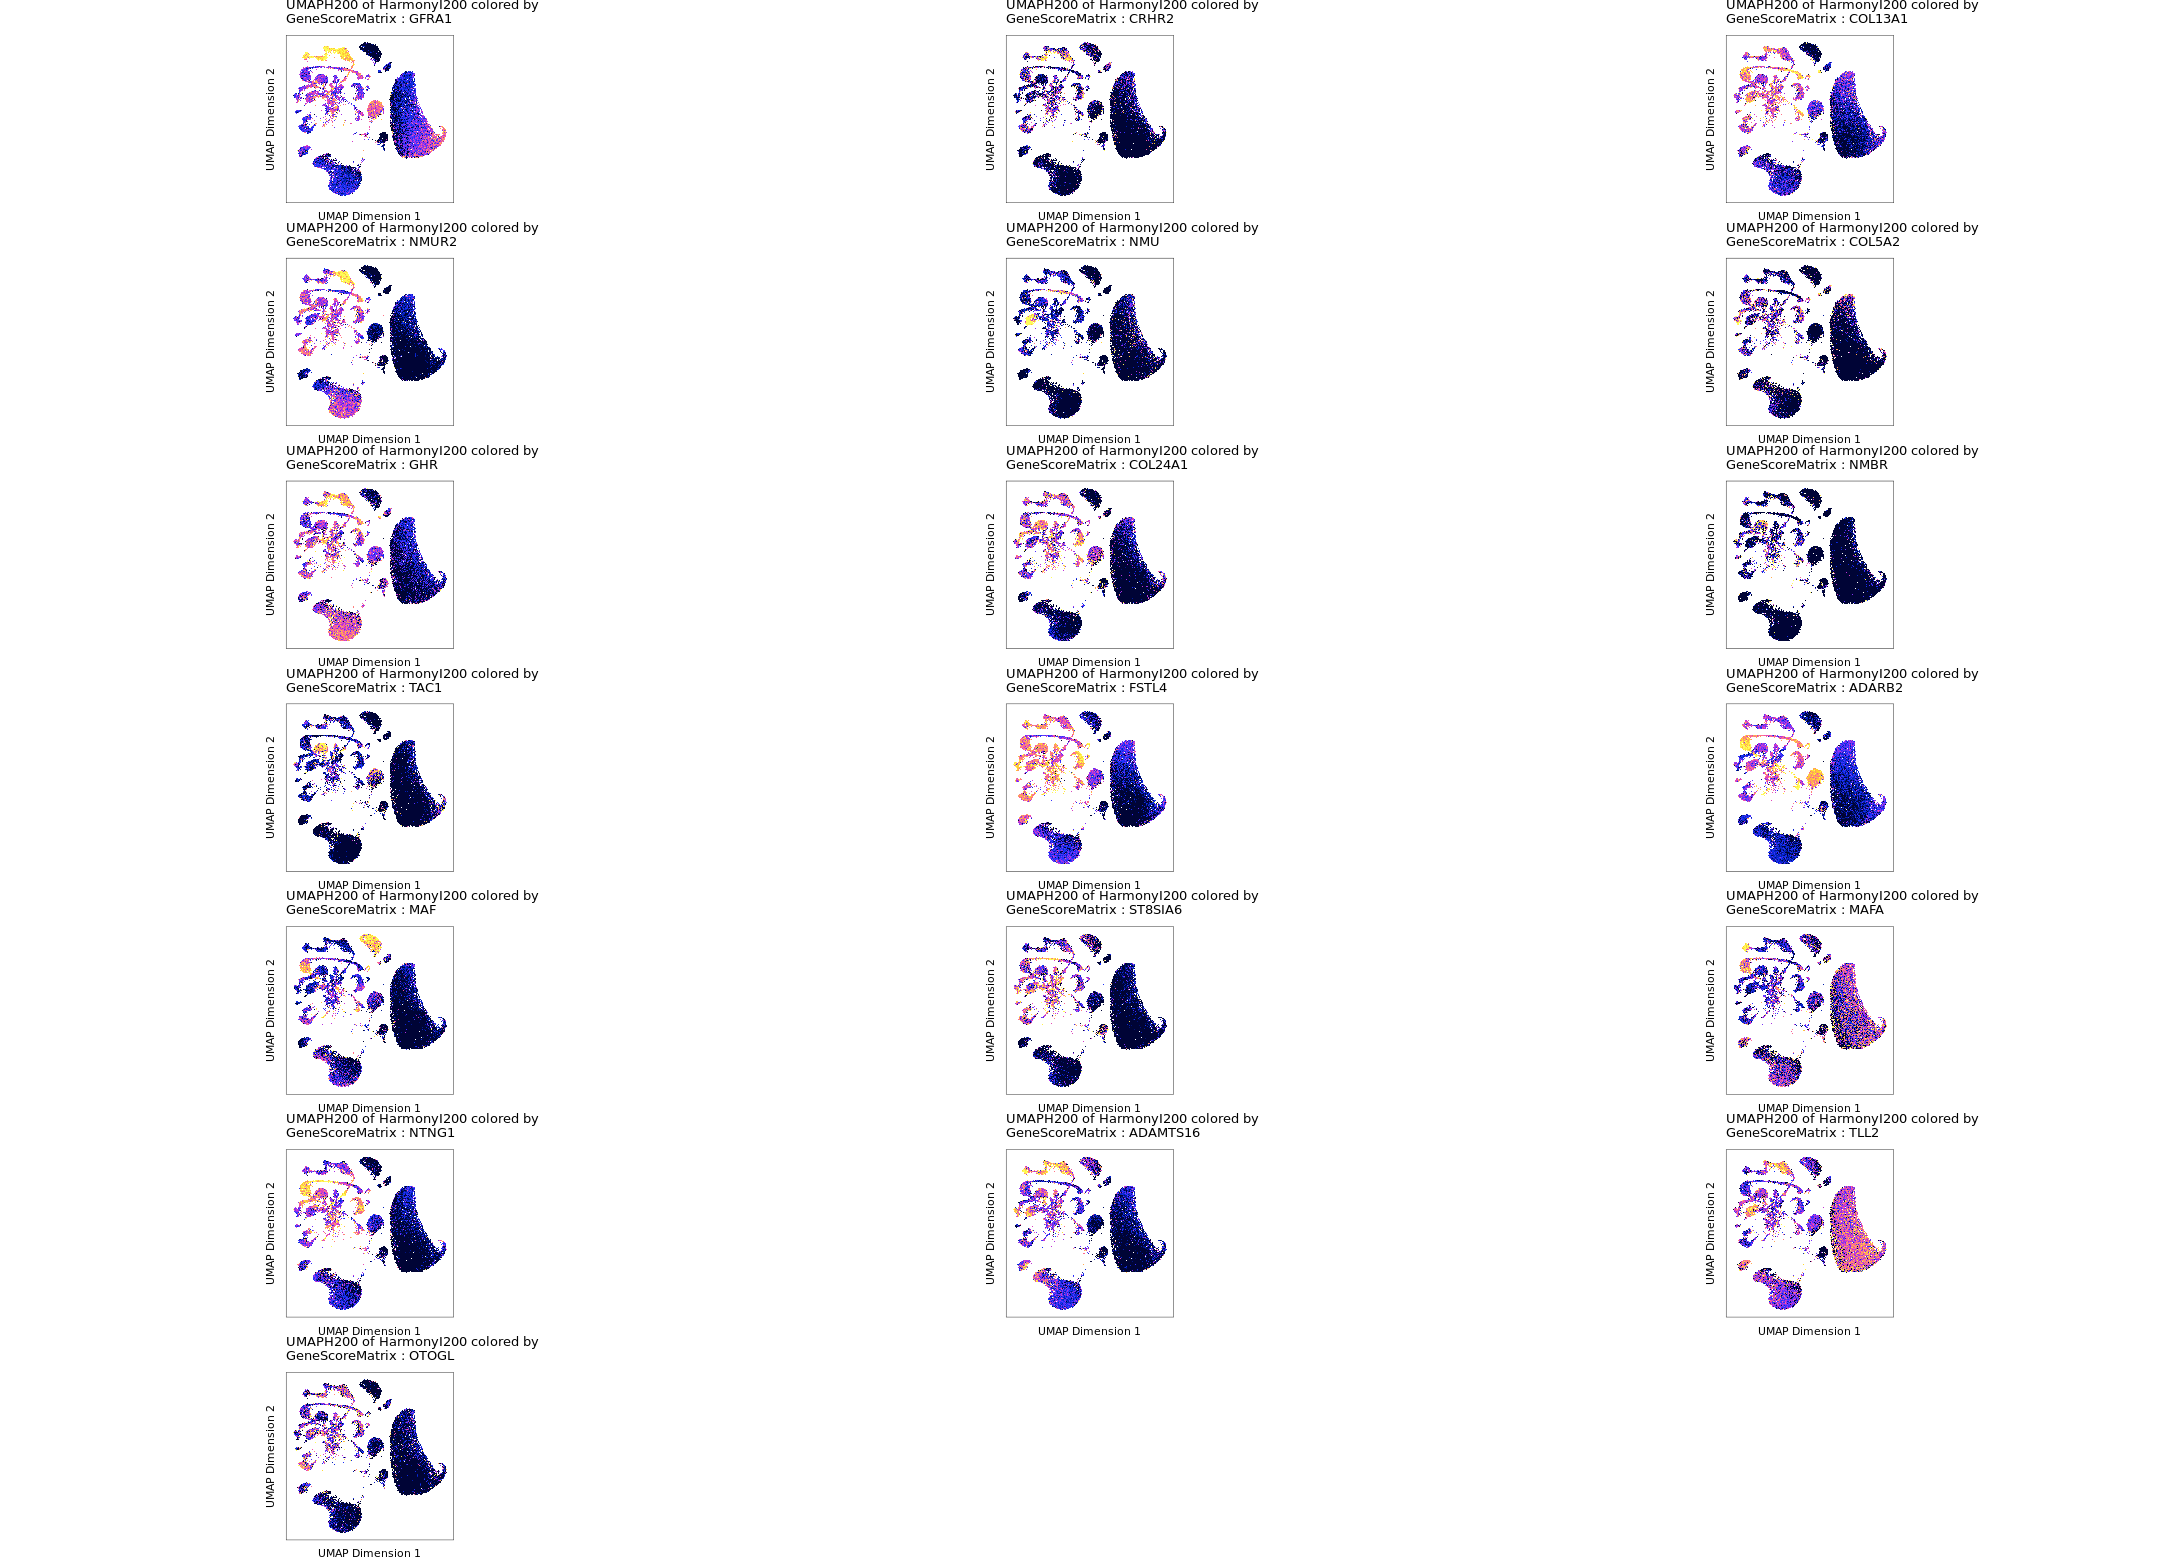

In [27]:
## Marker Genes for differentiation of Excitatory Neurons
markerGenes1  <- c('GFRA1',
                   'CRHR2',
                   'COL13A1',
                   'NMUR2',
#                    'TAC3',
                   'NMU',
                   'COL5A2',
                   'GHR',
                   'COL24A1',
                   'NMBR',
                   'TAC1',
#                    'ANOS1',
                   'FSTL4',
                   'ADARB2',
                   'MAF',
                   'ST8SIA6',
                   'MAFA',
                   'NTNG1',
                   'ADAMTS16',
                   'TLL2',
                   'OTOGL'
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e4c3c03a7-Date-2022-10-21_Time-10-17-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-10-21 10:17:20 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e4c3c03a7-Date-2022-10-21_Time-10-17-19.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` in

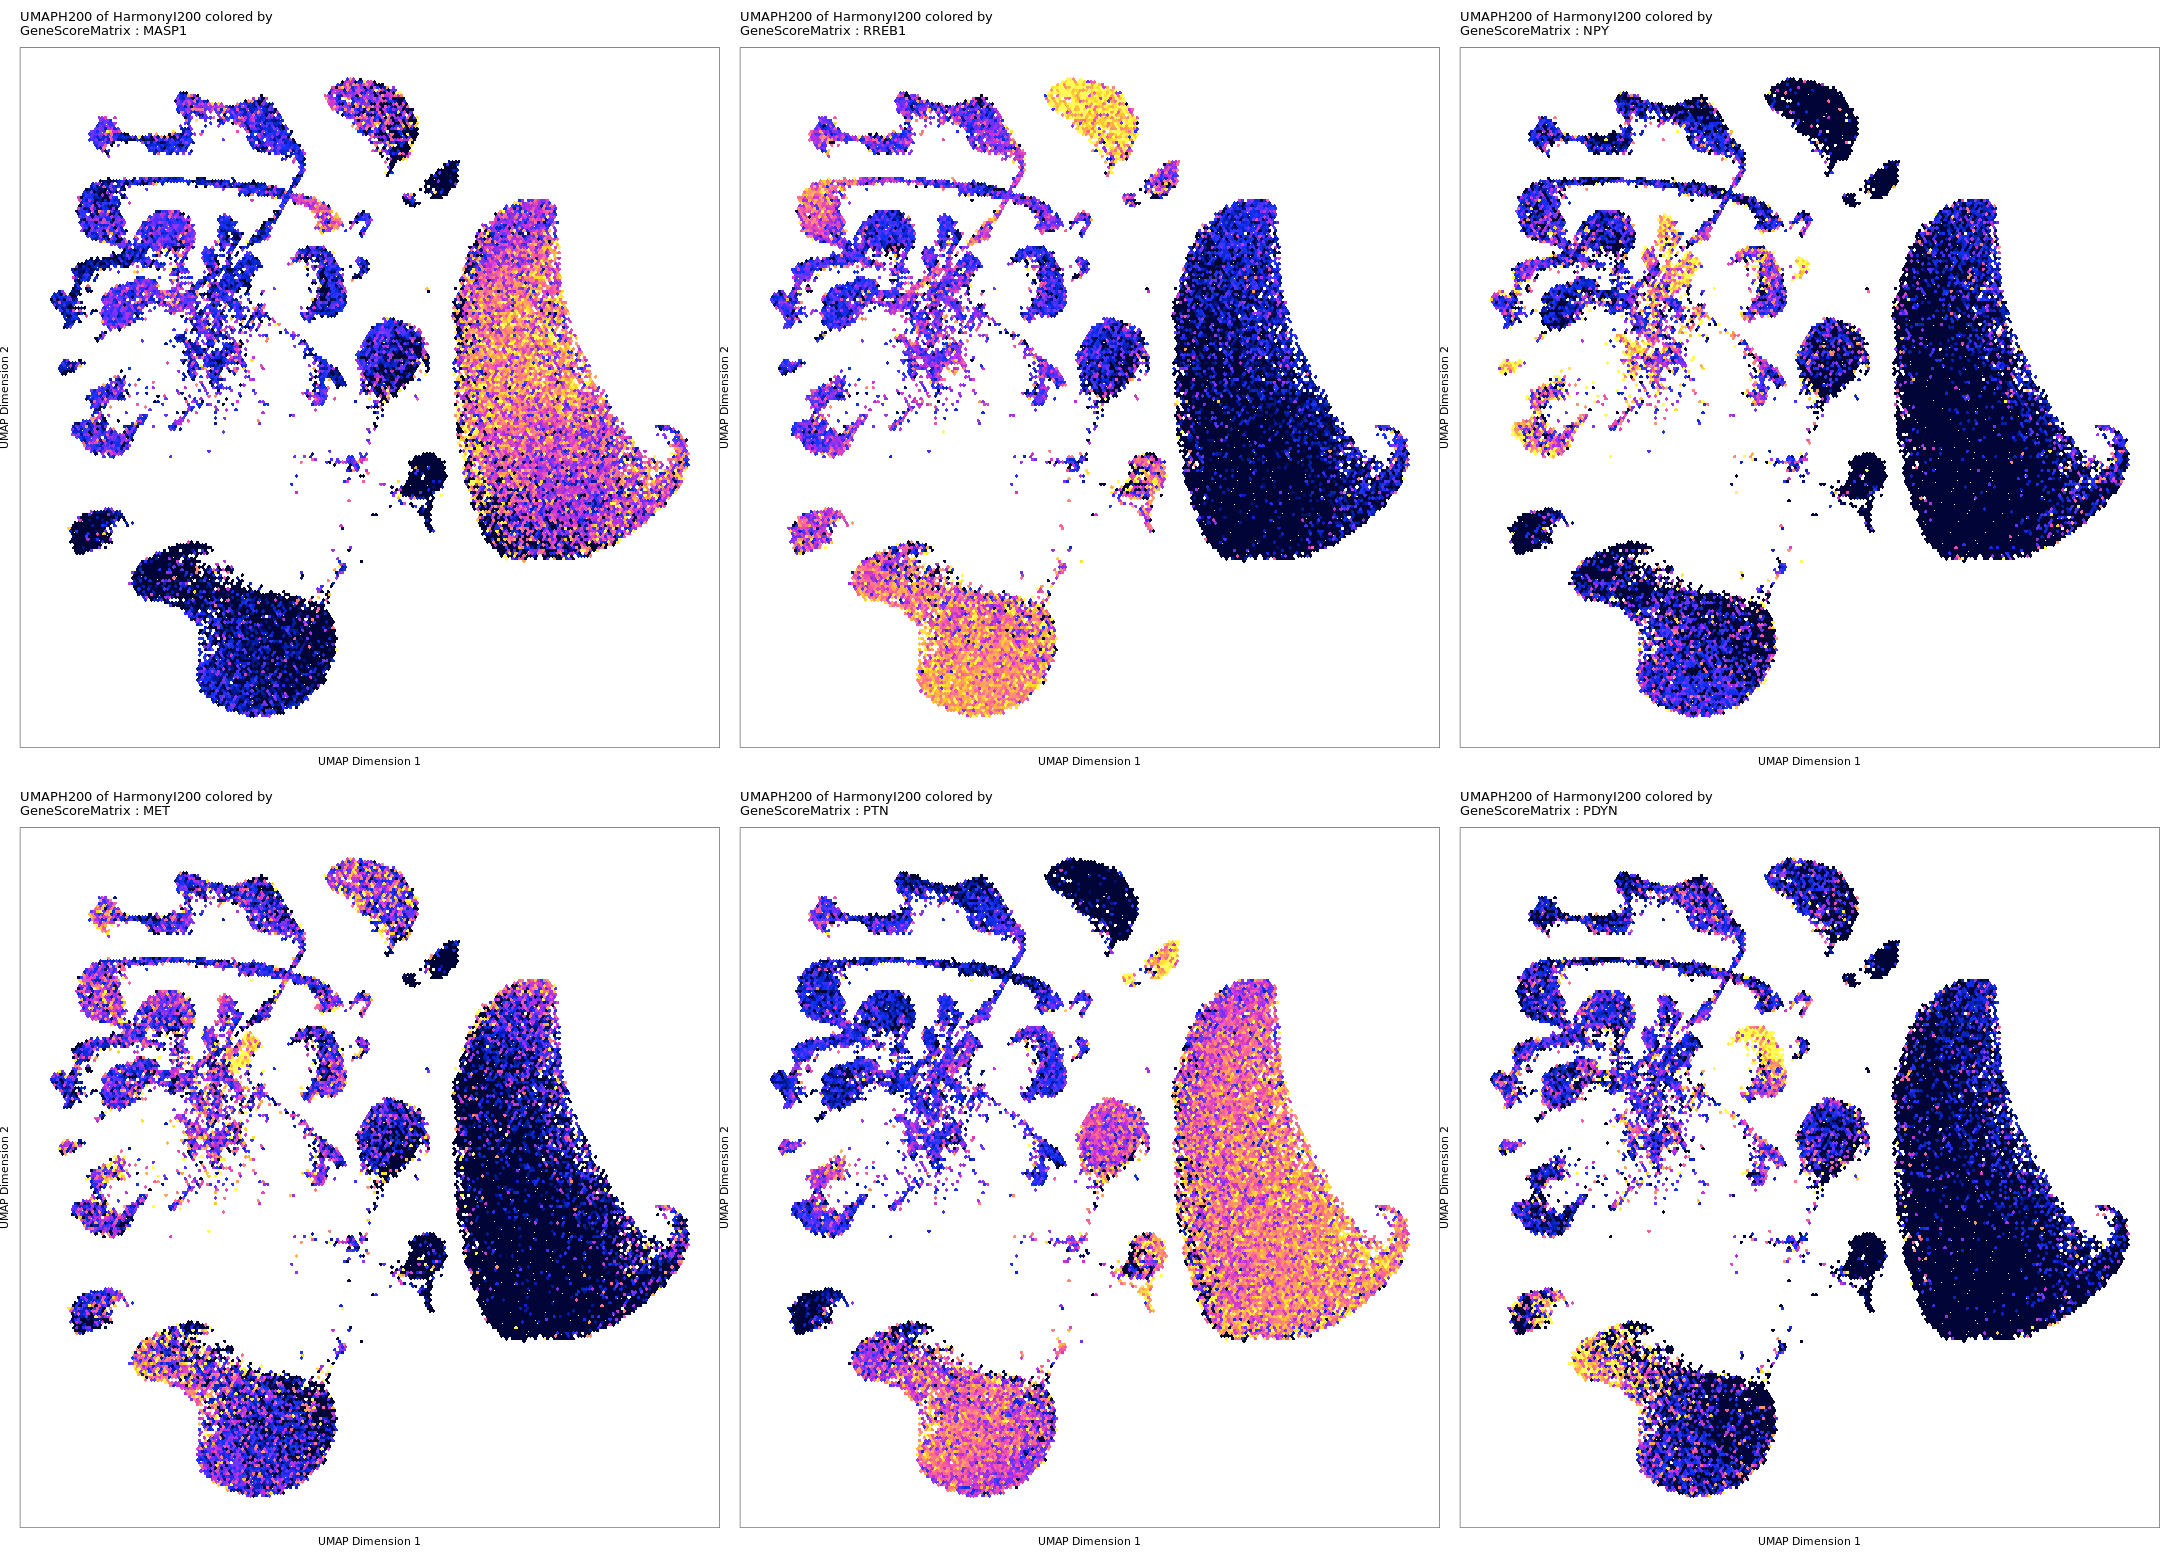

In [28]:
## Marker Genes for differentiation of Inhibitory Nuerons
markerGenes1  <- c('MASP1',
                   'RREB1',
                   'NPY',
                   'MET',
                   'PTN',
                   'PDYN'
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e842a4ec-Date-2022-10-21_Time-10-18-11.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e842a4ec-Date-2022-10-21_Time-10-18-11.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e51d6d3b8-Date-2022-10-21_Time-10-18-12.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e51d6d3b8-Date-2022-10-21_Time-10-18-12.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7ef066510-Date-2022-10-21_Time-10-18-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7ef066510-Date-2022-10-21_Time-

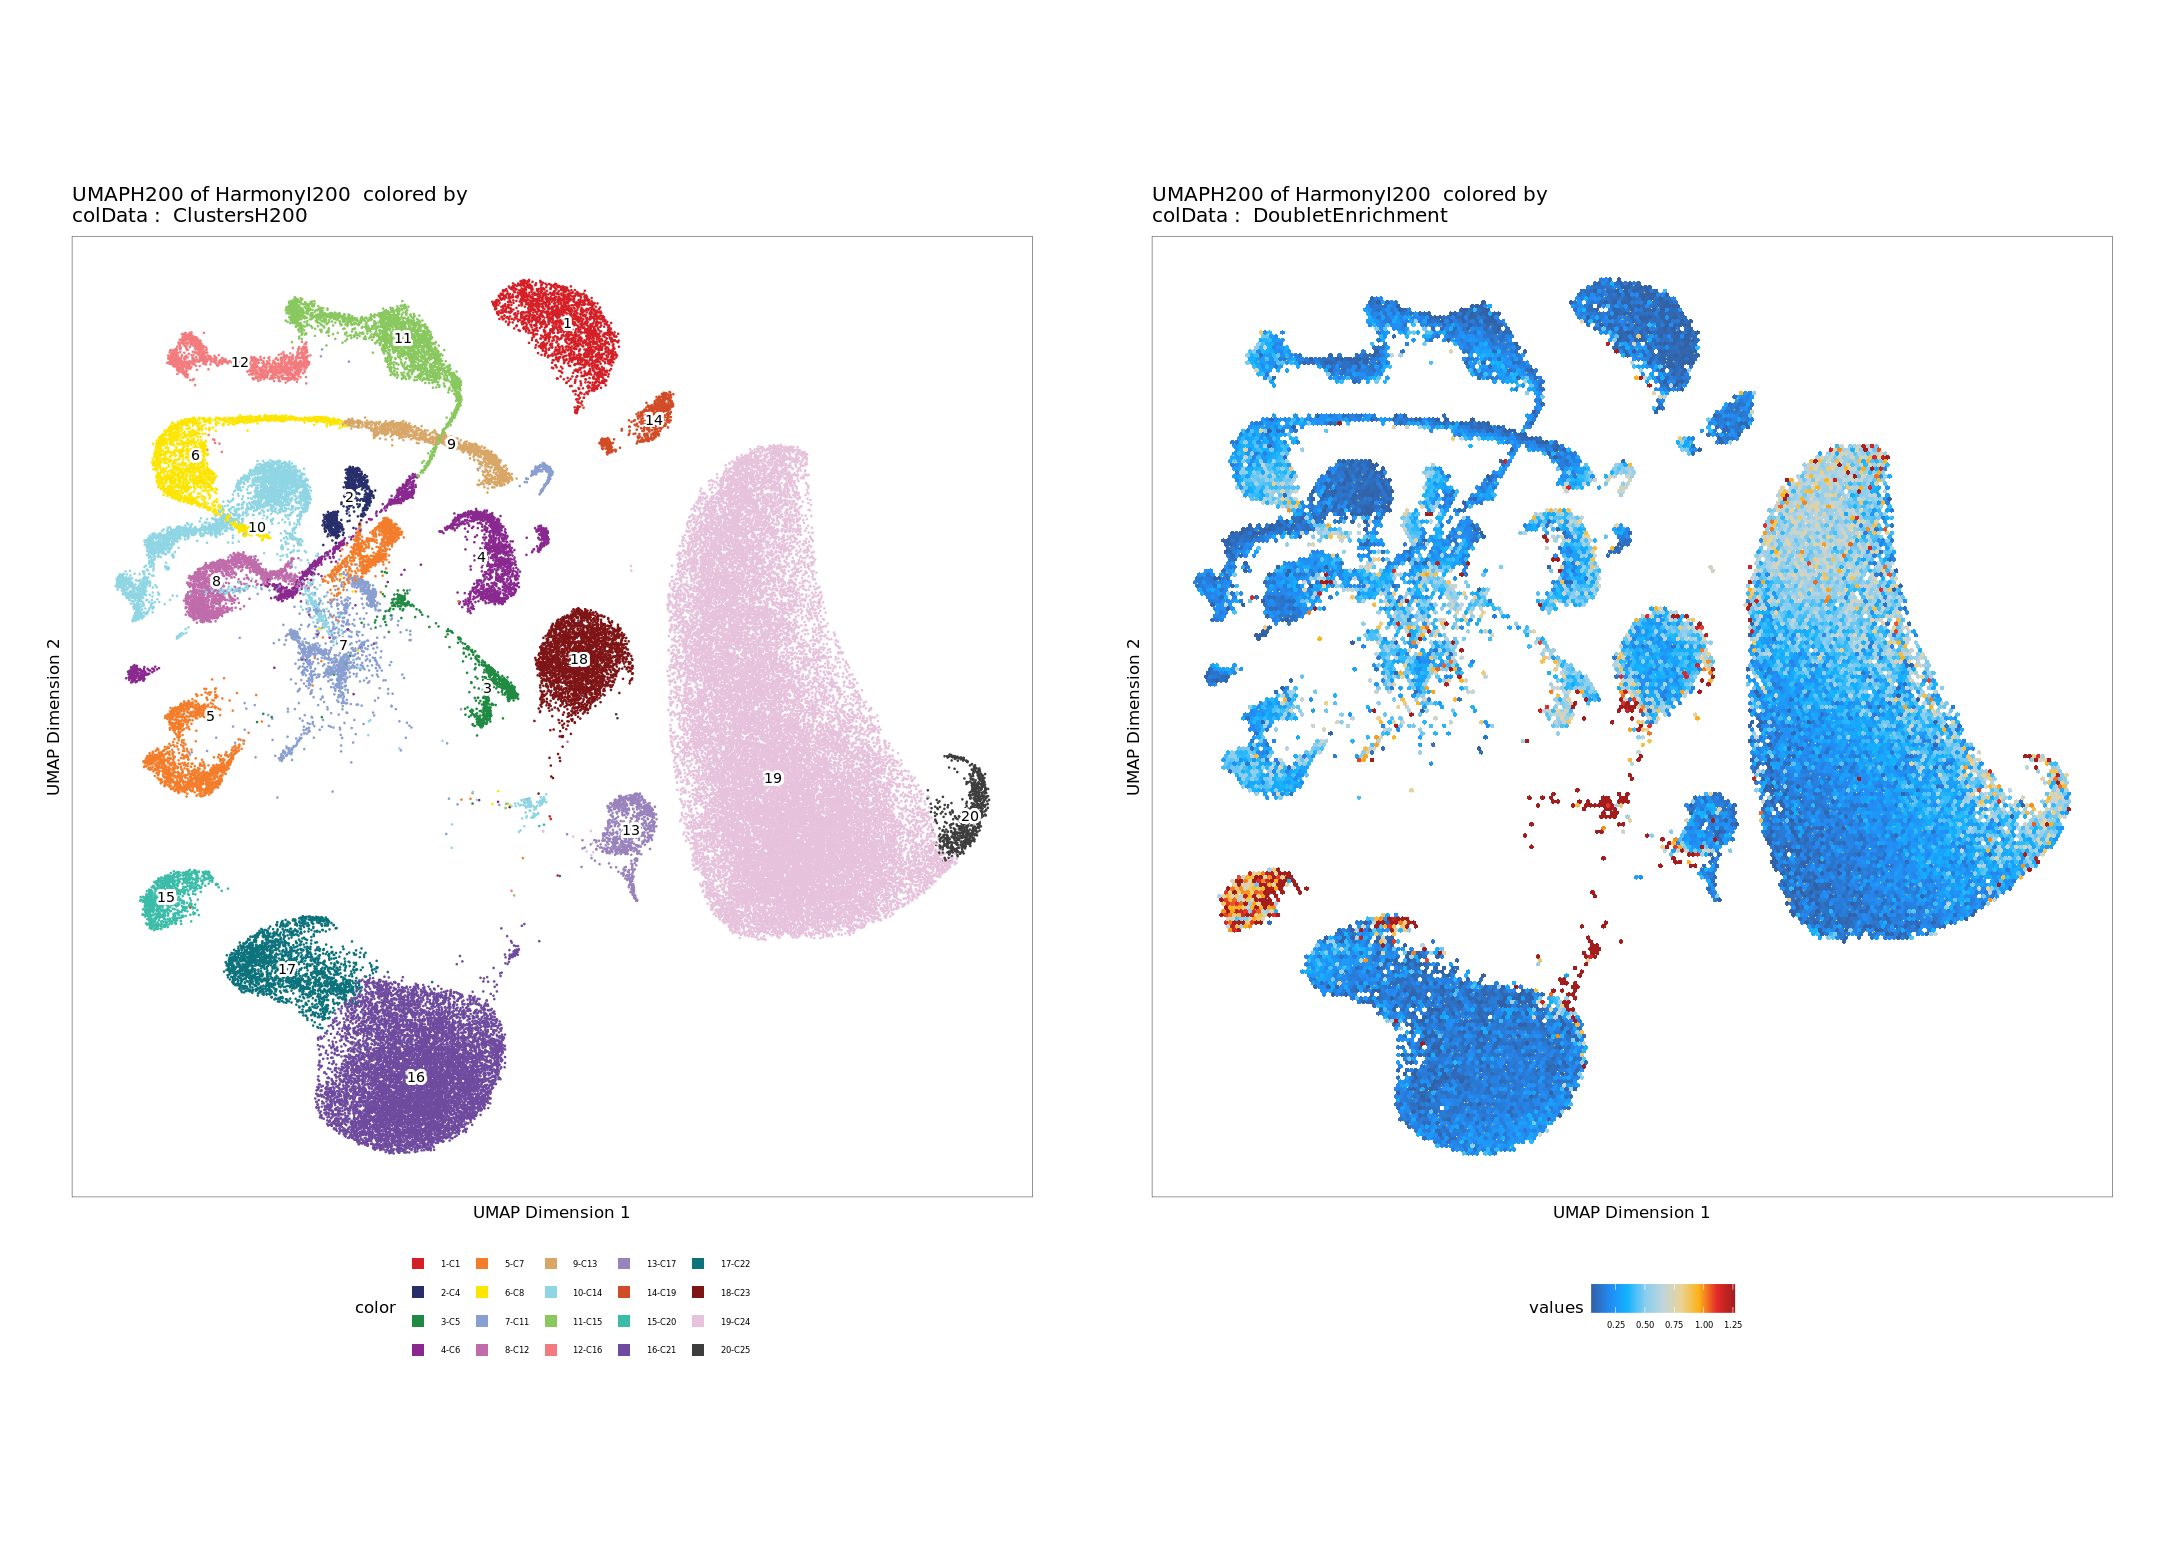

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-44b7e27ef7ad6-Date-2022-10-21_Time-10-18-26.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-44b7e27ef7ad6-Date-2022-10-21_Time-10-18-26.log



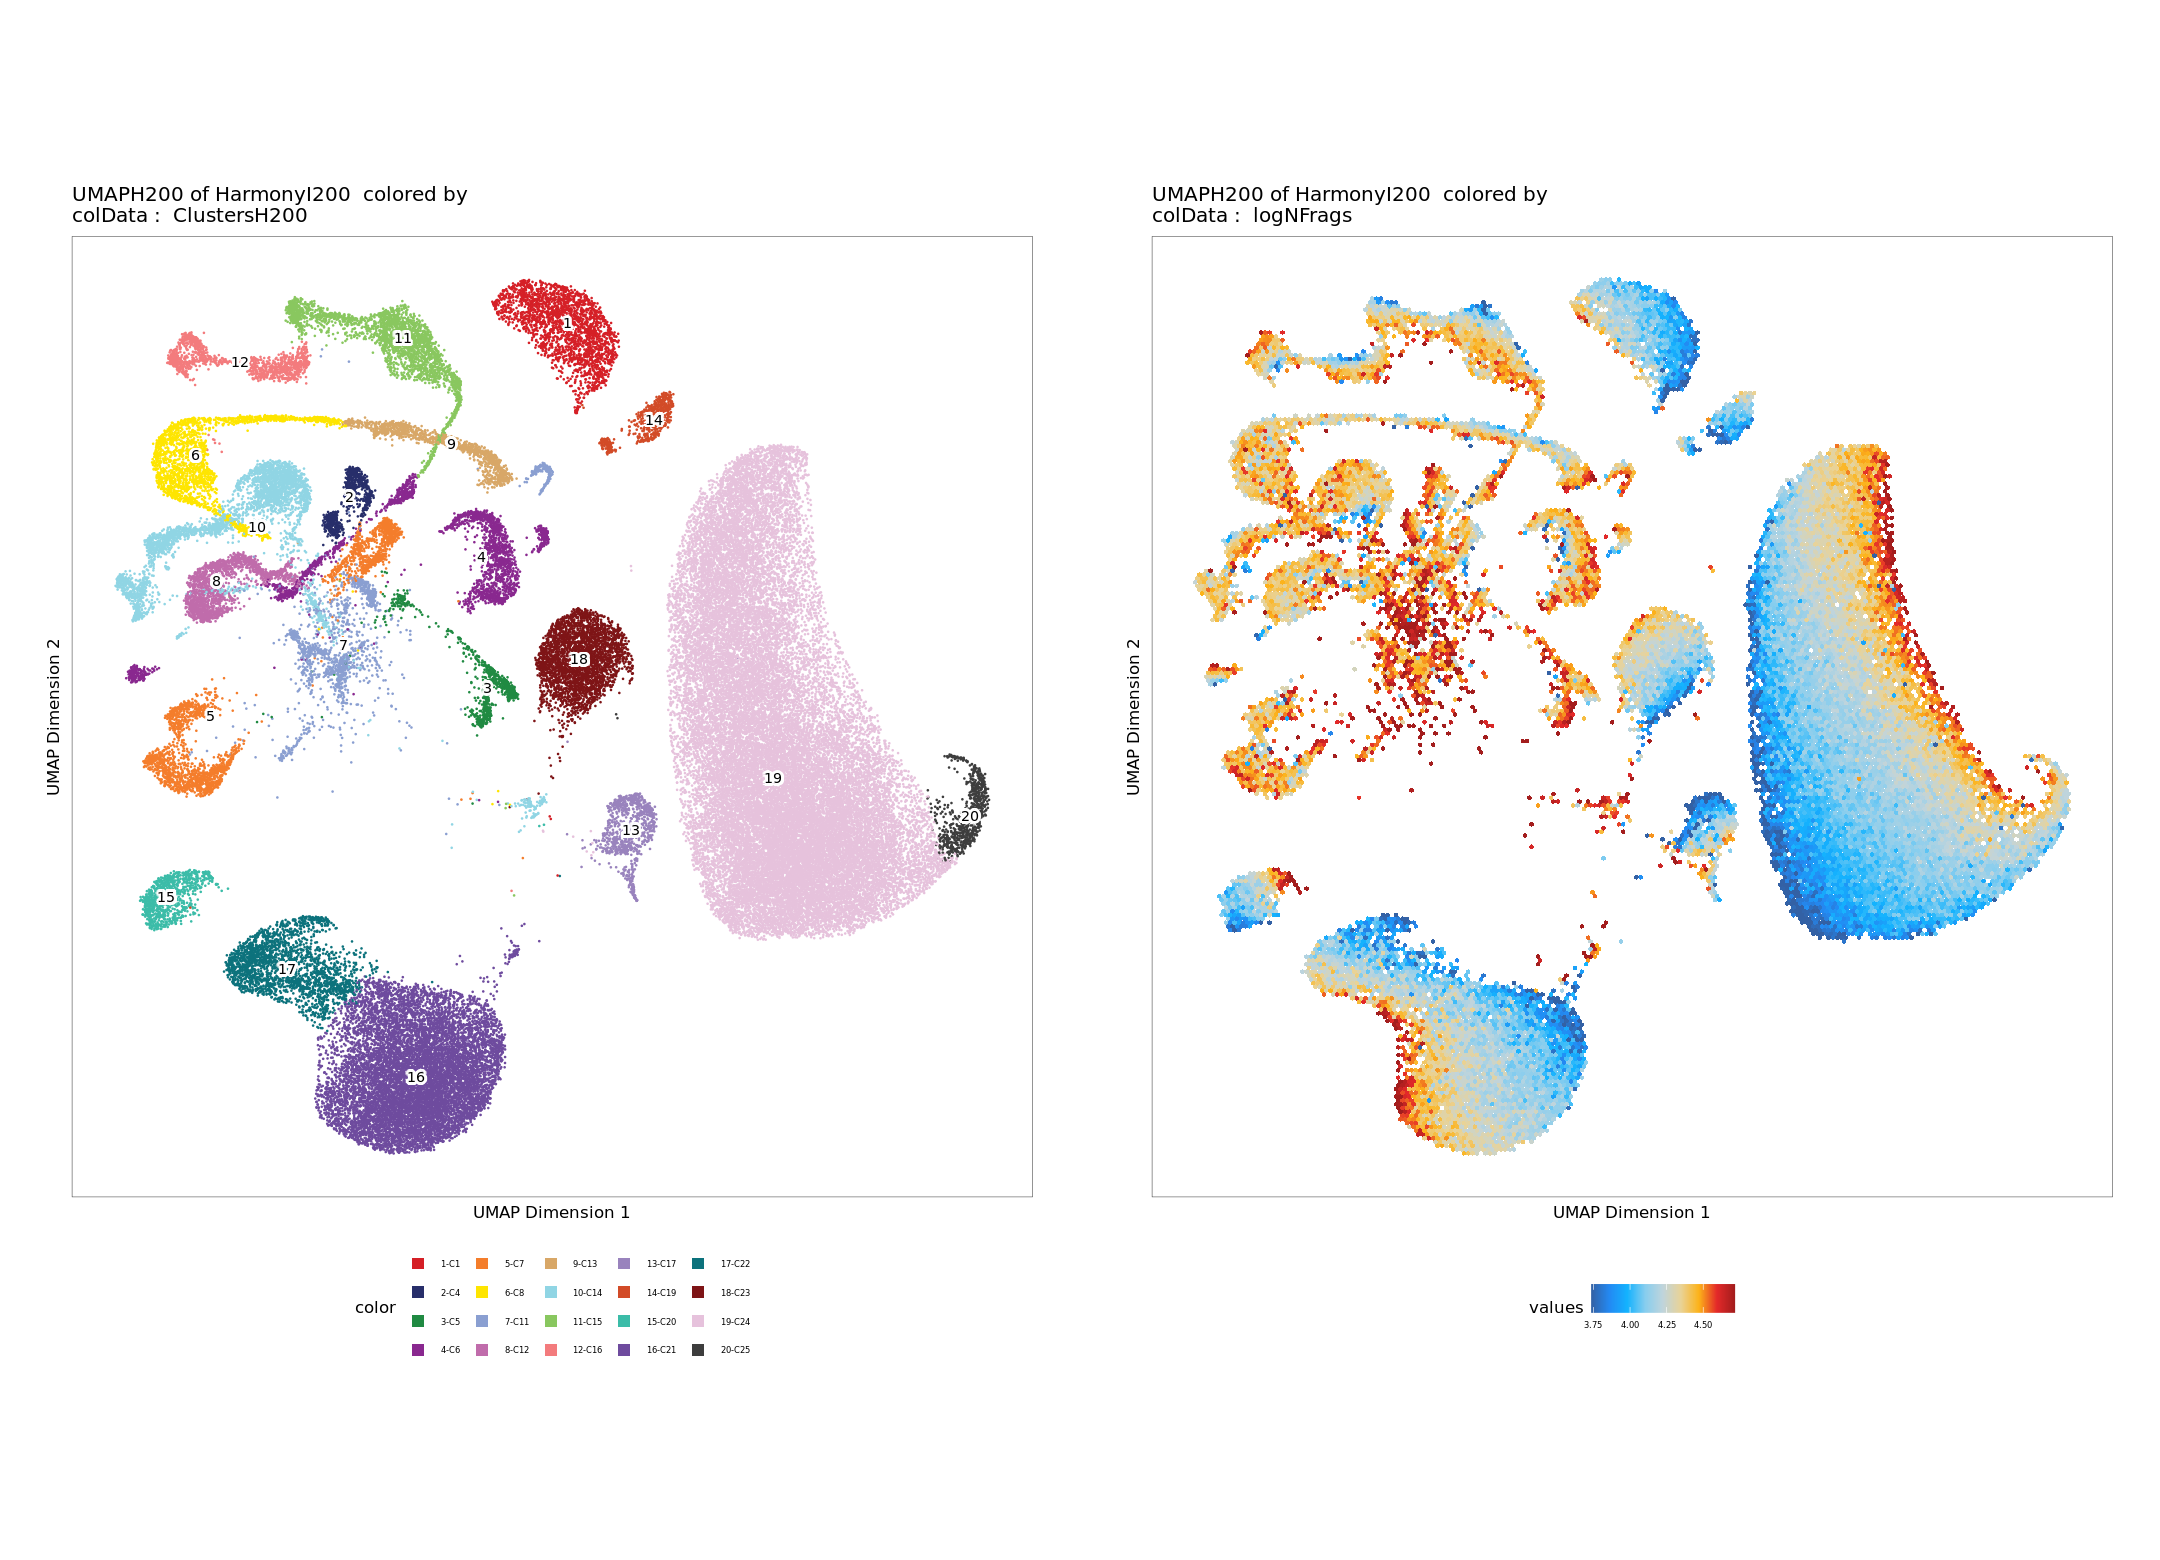

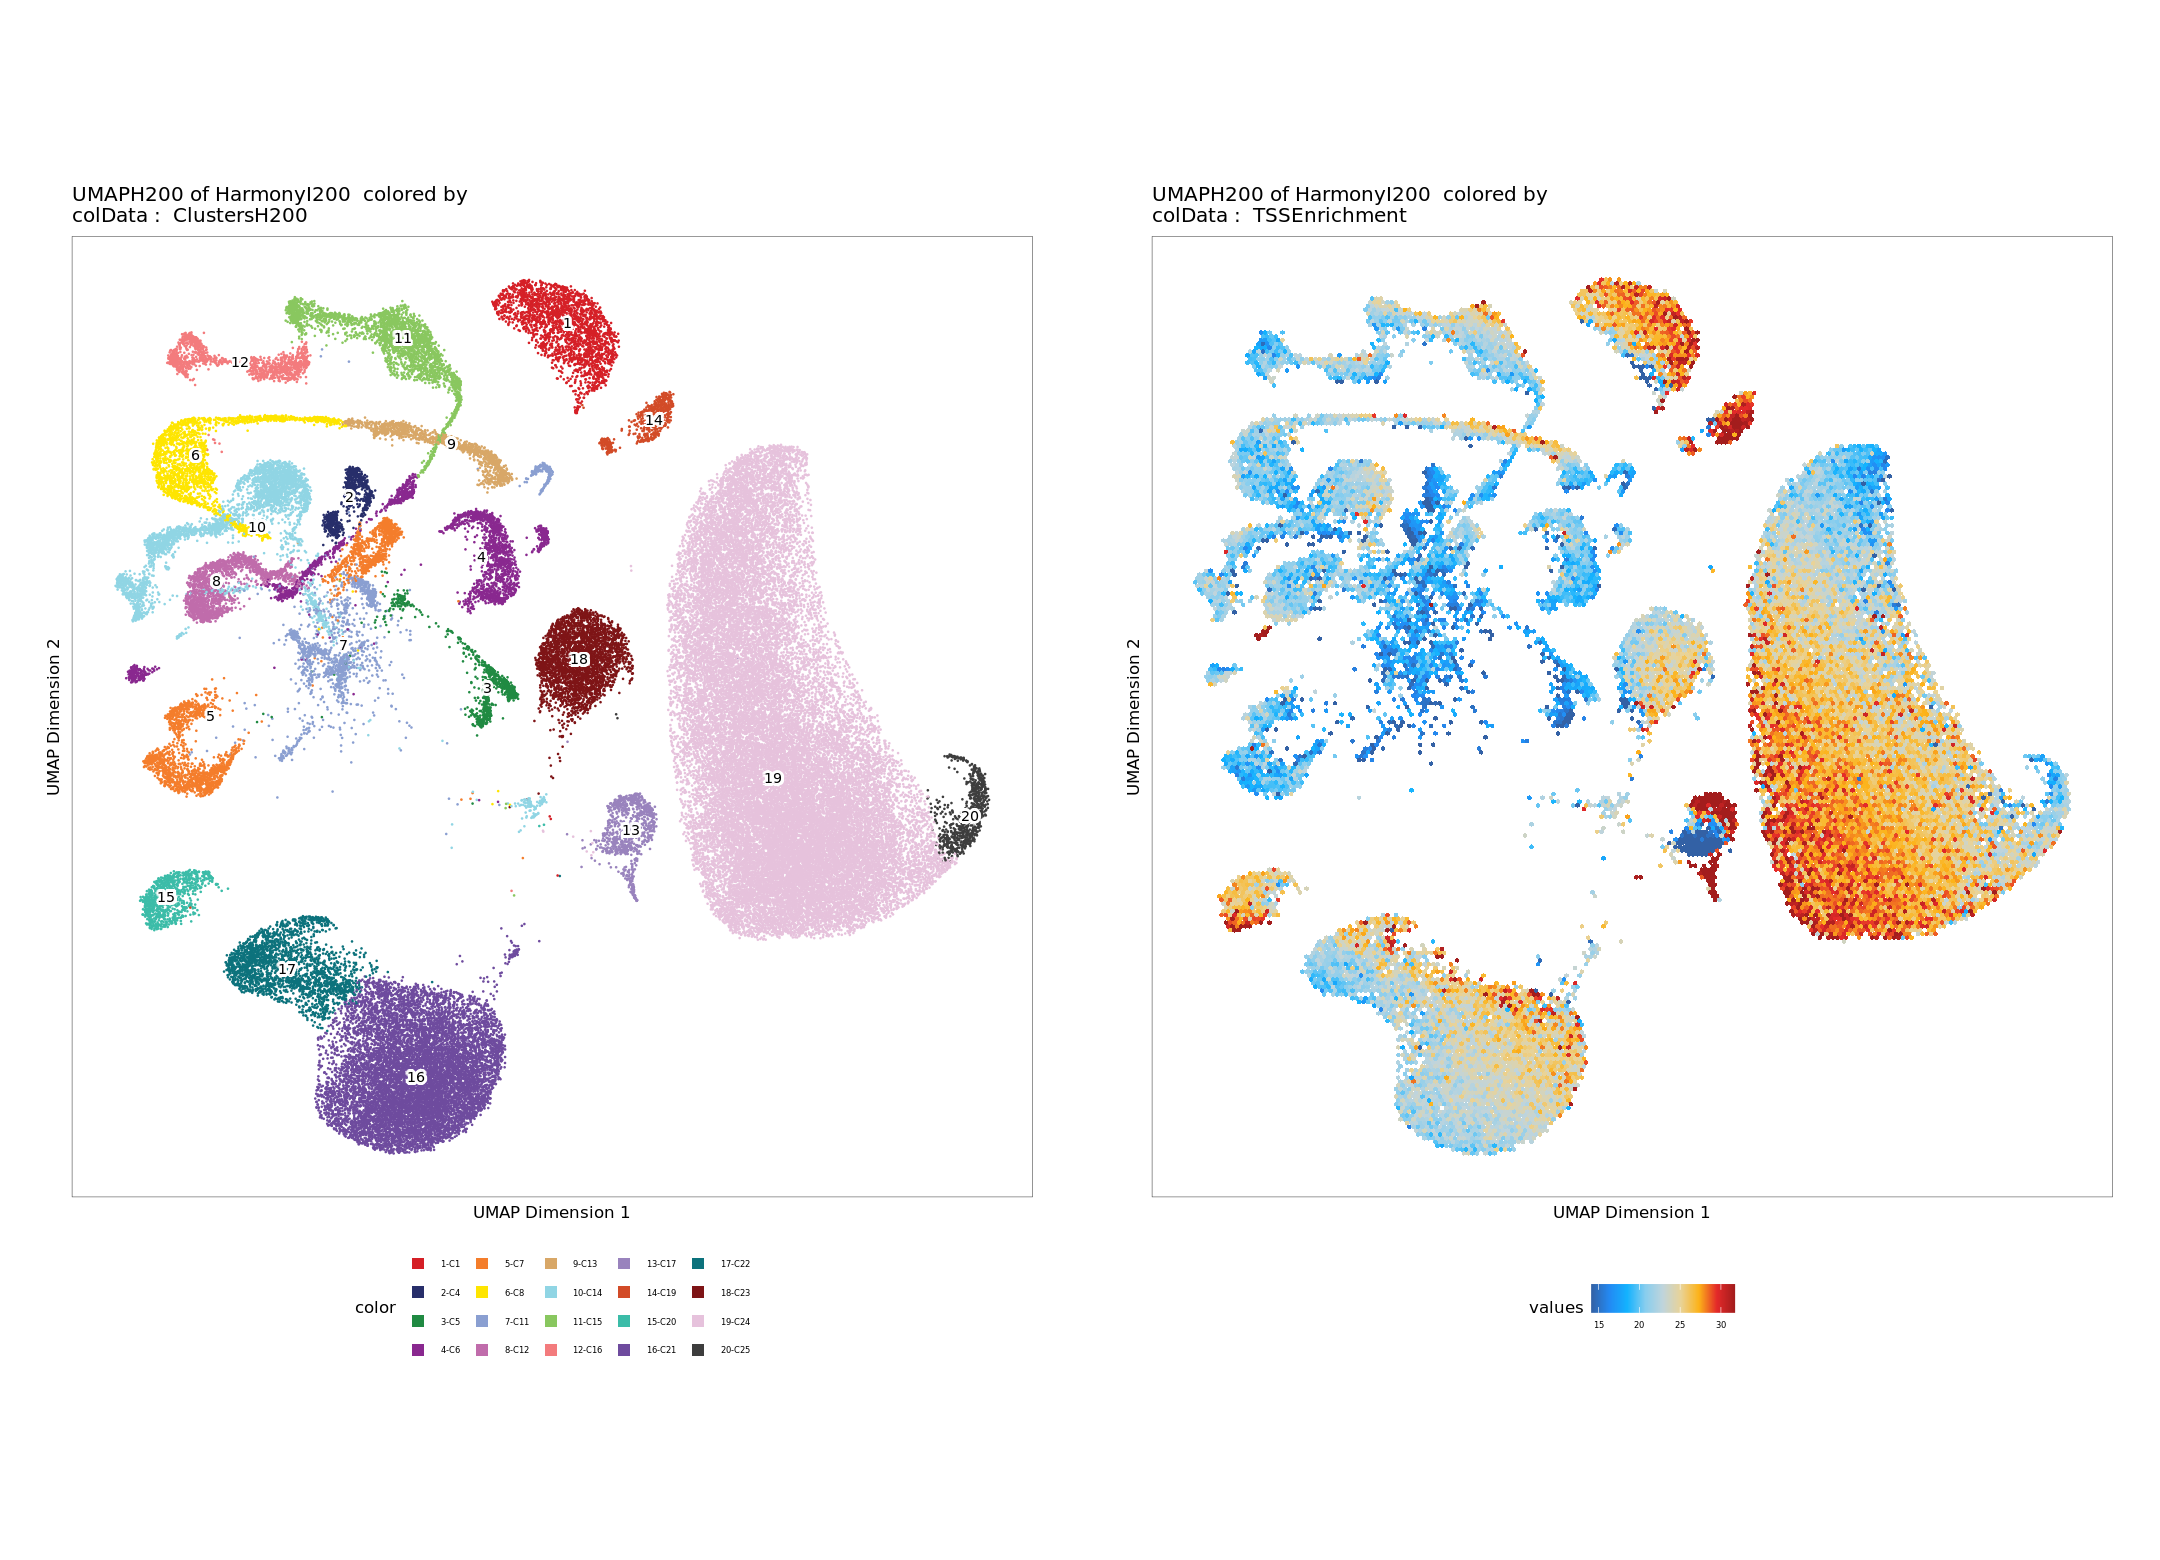

In [29]:
## make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersH200", embedding = "UMAPH200")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAPH200")

ggAlignPlots(p1, p2, type = "h")

proj$logNFrags = log10(proj$nFrags)

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAPH200")

ggAlignPlots(p1, p3, type = "h")

p4 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "TSSEnrichment", embedding = "UMAPH200")

ggAlignPlots(p1, p4, type = "h")

In [16]:
proj = saveArchRProject(proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [6]:
library(BSgenome.Mmusculus.UCSC.mm10)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact


The following object is masked from ‘package:plyr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:grid’:

    pattern


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer



# Call peaks using integrated clusters

In [8]:
# make group coverage, call peaks, and 
proj<-addGroupCoverages(proj, groupBy="predictedGroup_RNA2ATAC", 
                        minReplicates = 5, maxReplicates = 11, force = TRUE,
                        minCells = 40, maxCells = 1000)

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-2d9e2ec554f6-Date-2023-02-01_Time-21-48-53.log
If there is an issue, please report to github with logFile!

Astrocyte.1 (1 of 29) : CellGroups N = 11

Astrocyte.2 (2 of 29) : CellGroups N = 11

Endothelial (3 of 29) : CellGroups N = 11

Ependymal.cells (4 of 29) : CellGroups N = 11

GABA1 (5 of 29) : CellGroups N = 11

GABA2_1 (6 of 29) : CellGroups N = 5

GABA2_2 (7 of 29) : CellGroups N = 11

GABA3 (8 of 29) : CellGroups N = 5

GABA4_1 (9 of 29) : CellGroups N = 11

GABA4_2 (10 of 29) : CellGroups N = 11

GABA5 (11 of 29) : CellGroups N = 11

GLUT1 (12 of 29) : CellGroups N = 11

GLUT2 (13 of 29) : CellGroups N = 11

GLUT3 (14 of 29) : CellGroups N = 11

GLUT4 (15 of 29) : CellGroups N = 5

GLUT5 (16 of 29) : CellGroups N = 11

GLUT6 (17 of 29) : CellGroups N = 11

GLUT7 (18 of 29) : CellGroups N = 11

GLUT8 (19 of 29) : CellGroups N = 11

GLUT9 (20 of 29) : CellGroups N = 5

GLUT10 (21 of 29) : CellGroups N = 6

GLUT11 (22 of 29) 

In [10]:
proj = saveArchRProject(proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [9]:
# call peaks 
proj<-addReproduciblePeakSet(proj, groupBy = "predictedGroup_RNA2ATAC", reproducibility = "(n + 1)/2",
                             plot = FALSE, genomeSize = 2.7e9)

Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-2d9e276e9063-Date-2023-02-01_Time-23-47-42.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2023-02-01 23:47:44 : Peak Calling Parameters!, 0.027 mins elapsed.



                          Group nCells nCellsUsed nReplicates nMin nMax
Astrocyte.1         Astrocyte.1   2417       2295          11  122  293
Astrocyte.2         Astrocyte.2  10926       9492          11  677 1000
Endothelial         Endothelial    788        736          11   57   85
Ependymal.cells Ependymal.cells    951        903          11   56  113
GABA1                     GABA1   1078       1015          11   64  120
GABA2_1                 GABA2_1     64         63           5   40   40
GABA2_2                 GABA2_2   1545       1453          11  102  155
GABA3                     GABA3    376        376           5   43   97
GABA4_1                 GABA4_1    967        916          11   61  107
GABA4_2                 GABA4_2    795        749          11   48   94
GABA5                     GABA5   1320       1248          11   78  151
GLUT1                     GLUT1   1092       1032          11   70  131
GLUT2                     GLUT2   2452       2297          11  1

2023-02-01 23:47:44 : Batching Peak Calls!, 0.028 mins elapsed.

2023-02-01 23:47:46 : Batch Execution w/ safelapply!, 0 mins elapsed.

2023-02-02 01:28:26 : Identifying Reproducible Peaks!, 100.729 mins elapsed.

2023-02-02 01:30:36 : Creating Union Peak Set!, 102.887 mins elapsed.

Converged after 9 iterations!

2023-02-02 01:30:54 : Finished Creating Union Peak Set (518748)!, 103.194 mins elapsed.



In [10]:
# add peak counts matrix 
proj <- addPeakMatrix(proj)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-1c87954e054fd-Date-2023-02-09_Time-12-36-27.log
If there is an issue, please report to github with logFile!

2023-02-09 12:36:28 : Batch Execution w/ safelapply!, 0 mins elapsed.

Overriding previous entry for ReadsInPeaks

Overriding previous entry for FRIP

ArchR logging successful to : ArchRLogs/ArchR-addPeakMatrix-1c87954e054fd-Date-2023-02-09_Time-12-36-27.log



In [11]:
BiocManager::install("JASPAR2020")
library(JASPAR2020)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.3 (2022-03-10)

Installing package(s) 'JASPAR2020'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'brew', 'clue', 'commonmark', 'cpp11', 'curl', 'data.table',
  'desc', 'devtools', 'digest', 'evaluate', 'gargle', 'gert', 'gh', 'gitcreds',
  'haven', 'isoband', 'lifecycle', 'nlme', 'openssl', 'pracma', 'ragg',
  'RCurl', 'readr', 'rmarkdown', 'RSQLite', 'sys', 'testthat', 'tidyselect',
  'tinytex', 'vroom', 'xfun', 'XML', 'yaml', 'zip'



In [7]:
# add motif enrichment matrix
proj <- addMotifAnnotations(ArchRProj = proj, motifSet = "encode", name = "Motif",logFile = createLogFile("addMotifAnnotations"), species = getGenome(proj), force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-1c879242927da-Date-2023-02-09_Time-11-47-15.log
If there is an issue, please report to github with logFile!

peakAnnotation name already exists! Overriding.

2023-02-09 11:47:15 : Gettting Motif Set, Species : BSgenome.Mmusculus.UCSC.mm10, 0.004 mins elapsed.

2023-02-09 11:47:23 : Finding Motif Positions with motifmatchr!, 0.142 mins elapsed.

2023-02-09 12:32:55 : All Motifs Overlap at least 1 peak!, 45.668 mins elapsed.

2023-02-09 12:32:55 : Creating Motif Overlap Matrix, 45.668 mins elapsed.

2023-02-09 12:33:12 : Finished Getting Motif Info!, 45.957 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-1c879242927da-Date-2023-02-09_Time-11-47-15.log



In [11]:
# # add motif bgd peaks
proj <- addBgdPeaks(proj, force =  TRUE)


Identifying Background Peaks!



In [5]:
#add motif deviations matrix
proj <- addDeviationsMatrix(proj,  peakAnnotation = "Motif", force = TRUE)

Identifying Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-206be1585f45d-Date-2023-02-10_Time-09-45-41.log
If there is an issue, please report to github with logFile!



NULL


as(<lgCMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "dMatrix") instead

2023-02-10 09:46:06 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2023-02-10 20:57:46 : Completed Computing Deviations!, 672.082 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-206be1585f45d-Date-2023-02-10_Time-09-45-41.log



In [6]:
proj = saveArchRProject(proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [9]:
plotVarDev <- getVarDeviations(proj, name = "MotifMatrix")

[1] "GeneIntegrationMatrix" "GeneScoreMatrix"       "MotifMatrix"          
[4] "PeakMatrix"            "TileMatrix"

In [13]:
# add co-accessibility matrix
proj <- addCoAccessibility(proj, reducedDims = "HarmonyI200", dimsToUse = 1:30,
                           scaleDims = TRUE, corCutOff = 0.75, k = 100, 
                           knnIteration = 500, overlapCutoff = 0.8, 
                           maxDist = 1e+05, scaleTo = 10^4, log2Norm = TRUE)

ArchR logging to : ArchRLogs/ArchR-addCoAccessibility-44b7e20e09826-Date-2022-10-21_Time-09-13-02.log
If there is an issue, please report to github with logFile!

2022-10-21 09:13:02 : Computing KNN, 0.003 mins elapsed.

2022-10-21 09:13:03 : Identifying Non-Overlapping KNN pairs, 0.011 mins elapsed.

2022-10-21 09:13:07 : Identified 498 Groupings!, 0.076 mins elapsed.

2022-10-21 09:14:08 : Computing Co-Accessibility chr1 (1 of 20), 1.102 mins elapsed.

2022-10-21 09:14:54 : Computing Co-Accessibility chr2 (2 of 20), 1.87 mins elapsed.

2022-10-21 09:15:52 : Computing Co-Accessibility chr3 (3 of 20), 2.833 mins elapsed.

2022-10-21 09:16:35 : Computing Co-Accessibility chr4 (4 of 20), 3.557 mins elapsed.

2022-10-21 09:17:27 : Computing Co-Accessibility chr5 (5 of 20), 4.413 mins elapsed.

2022-10-21 09:18:18 : Computing Co-Accessibility chr6 (6 of 20), 5.275 mins elapsed.

2022-10-21 09:19:01 : Computing Co-Accessibility chr7 (7 of 20), 5.987 mins elapsed.

2022-10-21 09:19:52 : Comp

In [17]:
markerGenes  <- c('ITGB4',#Astrocyte1
                   'GFAP',#Astrocyte1
                   'SLC7A10',#Astrocyte2
                   'PDZRN4'#Astrocyte2
                  )

p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "ClustersH200", 
    geneSymbol = markerGenes, 
    upstream = 50000,
    downstream = 50000,
    loops = getCoAccessibility(proj)
)



ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-44b7e797f5dd7-Date-2022-10-21_Time-10-04-51.log
If there is an issue, please report to github with logFile!

2022-10-21 10:04:51 : Validating Region, 0.009 mins elapsed.



GRanges object with 4 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]    chr11 115974725-116008411      + |      192897       Itgb4
  [2]    chr11 102887336-102897200      - |       14580        Gfap
  [3]     chr7   35186385-35201111      + |       53896     Slc7a10
  [4]    chr15   92396810-92771819      + |      239618      Pdzrn4
  -------
  seqinfo: 21 sequences from mm10 genome


2022-10-21 10:04:51 : Adding Bulk Tracks (1 of 4), 0.011 mins elapsed.

2022-10-21 10:05:17 : Adding Feature Tracks (1 of 4), 0.437 mins elapsed.

2022-10-21 10:05:17 : Adding Loop Tracks (1 of 4), 0.438 mins elapsed.

2022-10-21 10:05:21 : Adding Gene Tracks (1 of 4), 0.507 mins elapsed.

2022-10-21 10:05:21 : Plotting, 0.51 mins elapsed.

2022-10-21 10:05:25 : Adding Bulk Tracks (2 of 4), 0.574 mins elapsed.

2022-10-21 10:05:45 : Adding Feature Tracks (2 of 4), 0.899 mins elapsed.

2022-10-21 10:05:45 : Adding Loop Tracks (2 of 4), 0.9 mins elapsed.

2022-10-21 10:05:49 : Adding Gene Tracks (2 of 4), 0.969 mins elapsed.

2022-10-21 10:05:50 : Plotting, 0.989 mins elapsed.

2022-10-21 10:05:54 : Adding Bulk Tracks (3 of 4), 1.053 mins elapsed.

2022-10-21 10:06:13 : Adding Feature Tracks (3 of 4), 1.379 mins elapsed.

2022-10-21 10:06:13 : Adding Loop Tracks (3 of 4), 1.38 mins elapsed.

2022-10-21 10:06:23 : Adding Gene Tracks (3 of 4), 1.543 mins elapsed.

2022-10-21 10:06:23 : Plo

In [11]:
names(attributes(proj)$reducedDims)

[1] "IterativeLSI30"  "IterativeLSI200" "HarmonyI200"

In [8]:
proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [5]:
getAvailableMatrices(proj)

[1] "GeneIntegrationMatrix" "GeneScoreMatrix"       "MotifMatrix"          
[4] "PeakMatrix"            "TileMatrix"

In [6]:
#rename label set
proj <- addCellColData(ArchRProj = proj, data = proj$predictedGroup_RNA2ATAC,
    cells = rownames(getCellColData(proj)), name = "FINAL_GROUP_LABEL", force = TRUE)
names(getCellColData(proj))
getCellColData(proj)

[1] "Sample"                    "TSSEnrichment"            
 [3] "ReadsInTSS"                "ReadsInPromoter"          
 [5] "ReadsInBlacklist"          "PromoterRatio"            
 [7] "PassQC"                    "NucleosomeRatio"          
 [9] "nMultiFrags"               "nMonoFrags"               
[11] "nFrags"                    "nDiFrags"                 
[13] "DoubletScore"              "DoubletEnrichment"        
[15] "BlacklistRatio"            "Sample_ID"                
[17] "Date.nuclei.prep"          "Biological.rep"           
[19] "Age"                       "Sex"                      
[21] "Species"                   "Region"                   
[23] "ClustersI200"              "ClustersH200"             
[25] "logNFrags"                 "Celltype1"                
[27] "predictedGroup_RNA2ATACCo" "ReadsInPeaks"             
[29] "FRIP"                      "predictedGroup_RNA2ATAC"  
[31] "FINAL_GROUP_LABEL"

DataFrame with 75955 rows and 31 columns
                                                  Sample TSSEnrichment
                                             <character>     <numeric>
Mouse_DH_SEA2253A58#TTACACACTTCGTCAA Mouse_DH_SEA2253A58        14.164
Mouse_DH_SEA2253A58#GCGTGCTGAAGCAGGT Mouse_DH_SEA2253A58        15.910
Mouse_DH_SEA2253A58#CGACCAGACTTCTGAG Mouse_DH_SEA2253A58        10.861
Mouse_DH_SEA2253A58#TCAGTCCTGAATACAG Mouse_DH_SEA2253A58        17.269
Mouse_DH_SEA2253A58#GAGGGATACCTGGCAC Mouse_DH_SEA2253A58        25.310
...                                                  ...           ...
Mouse_DH_SEA2253A69#GACTACCCTGGCCATC Mouse_DH_SEA2253A69        10.693
Mouse_DH_SEA2253A69#GACAAGGTGCTGAGAG Mouse_DH_SEA2253A69        17.317
Mouse_DH_SEA2253A69#GACCTATGAGGTGCAA Mouse_DH_SEA2253A69        11.675
Mouse_DH_SEA2253A69#GACTACCCTTCGGGCT Mouse_DH_SEA2253A69        13.119
Mouse_DH_SEA2253A69#TAAAAAAAAAAAAAAG Mouse_DH_SEA2253A69        30.716
                                    

In [7]:
table(proj$predictedGroup_RNA2ATAC)
table(proj$FINAL_GROUP_LABEL)
proj = saveArchRProject(ArchRProj = proj)


    Astrocyte.1     Astrocyte.2     Endothelial Ependymal.cells           GABA1 
           2417           10926             788             951            1078 
        GABA2_1         GABA2_2           GABA3         GABA4_1         GABA4_2 
             64            1545             376             967             795 
          GABA5           GLUT1          GLUT10          GLUT11           GLUT2 
           1320            1092             431              39            2452 
          GLUT3           GLUT4           GLUT5           GLUT6           GLUT7 
           1945             341             992            2195            2283 
          GLUT8           GLUT9        Meninges       Microglia          midVen 
           1157               1               2            2328            1518 
          Mural         Oligo.1         Oligo.2             OPC 
            736           32624            1244            3348 


    Astrocyte.1     Astrocyte.2     Endothelial Ependymal.cells           GABA1 
           2417           10926             788             951            1078 
        GABA2_1         GABA2_2           GABA3         GABA4_1         GABA4_2 
             64            1545             376             967             795 
          GABA5           GLUT1          GLUT10          GLUT11           GLUT2 
           1320            1092             431              39            2452 
          GLUT3           GLUT4           GLUT5           GLUT6           GLUT7 
           1945             341             992            2195            2283 
          GLUT8           GLUT9        Meninges       Microglia          midVen 
           1157               1               2            2328            1518 
          Mural         Oligo.1         Oligo.2             OPC 
            736           32624            1244            3348 

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         